
<table style="border:2px solid white;" cellspacing="0" cellpadding="0" border-collapse: collapse; border-spacing: 0;>
  <tr> 
    <th style="background-color:white"> <img src="../media/ccal-logo-D3.png" width=225 height=225></th>
    <th style="background-color:white"> <img src="../media/logoMoores.jpg" width=175 height=175></th>
    <th style="background-color:white"> <img src="../media/GP.png" width=200 height=200></th>
    <th style="background-color:white"> <img src="../media/UCSD_School_of_Medicine_logo.png" width=175 height=175></th> 
    <th style="background-color:white"> <img src="../media/Broad.png" width=130 height=130></th> 
  </tr>
</table>


<hr style="border: none; border-bottom: 3px solid #88BBEE;">
# **Onco-*GPS* Methodology**
## **Chapter 10. BRAF mutants *Onco*-GPS Map**

**Authors:** Huwate (Kwat) Yeerna -  *Computational Cancer Analysis Laboratory (CCAL), UCSD Moores Cancer Center*  
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;
 William Kim - Cancer Program, *Eli and Edythe Broad Institute*      
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; 
Taylor Cavazos - *Computational Cancer Analysis Laboratory (CCAL), UCSD Moores Cancer Center*   
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; 
Kate Medetgul-Ernar - *Computational Cancer Analysis Laboratory (CCAL), UCSD Moores Cancer Center*   
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; 
 Clarence Mah - *Mesirov Lab, UCSD School of Medicine and Moores Cancer Center*      
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; 
Jill P. Mesirov - *Mesirov Lab, UCSD School of Medicine and Moores Cancer Center*  
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; 
Pablo Tamayo - *Computational Cancer Analysis Laboratory (CCAL), UCSD Moores Cancer Center* 

**Date:** Jan 5, 2017

**Article:** [*Kim et al.* Decomposing Oncogenic Transcriptional Signatures to Generate Maps of Divergent Cellular States](https://drive.google.com/file/d/0B0MQqMWLrsA4b2RUTTAzNjFmVkk/view?usp=sharing)

**Analysis overview:** We define an Onco-GPS map for BRAF mutants.

Back to the [chapter (0)](0 Introduction and Overview.ipynb).

<hr style="border: none; border-bottom: 3px solid #88BBEE;">
### 1. Set up notebook and import Computational Cancer Analysis Library ([CCAL](https://github.com/KwatME/ccal))

In [1]:
from environment import *

%matplotlib inline
%load_ext autoreload
%autoreload 2

[2017-03-10 19:00:16] Checking dependencies (rpy2, plotly) ...


### 2. Load the Feature Datasets

In [2]:
mut_cna_df = ccal.read_gct('../data/ccle_mut_cna.gct')
gene_dependency_df = ccal.read_gct('../data/ccle_gene_dependency.gct')
gene_expression_df = ccal.read_gct('../data/rnaseq.v3.NO_HAEM.gct')
pathway_expression_df = ccal.read_gct('../data/ccle_pathway_expression_all.gct')
regulator_df = ccal.read_gct('../data/ccle_regulator.gct')
protein_expression_df = ccal.read_gct('../data/ccle_protein_expression.gct')
tissue_df = ccal.read_gct('../data/ccle_tissue.gct')
drug_sensitivity_df = ccal.read_gct('../data/ccle_drug_sensitivity.gct')
drug_sensitivity2_df = ccal.read_gct('../data/all.cpds.auc08.gct')

### 4. Read oncogenic components and select the subset BRAF mut samples

#### 4.1 Select BRAF mut samples 

In [3]:
braf_mutants = mut_cna_df.columns[mut_cna_df.ix['BRAF_MUT', :].astype(bool)]
h_matrix = ccal.read_gct('../results/nmf/matrices/nmf_k9_h.gct')
braf_mutant_h_matrix = h_matrix.ix[:, h_matrix.columns & braf_mutants]

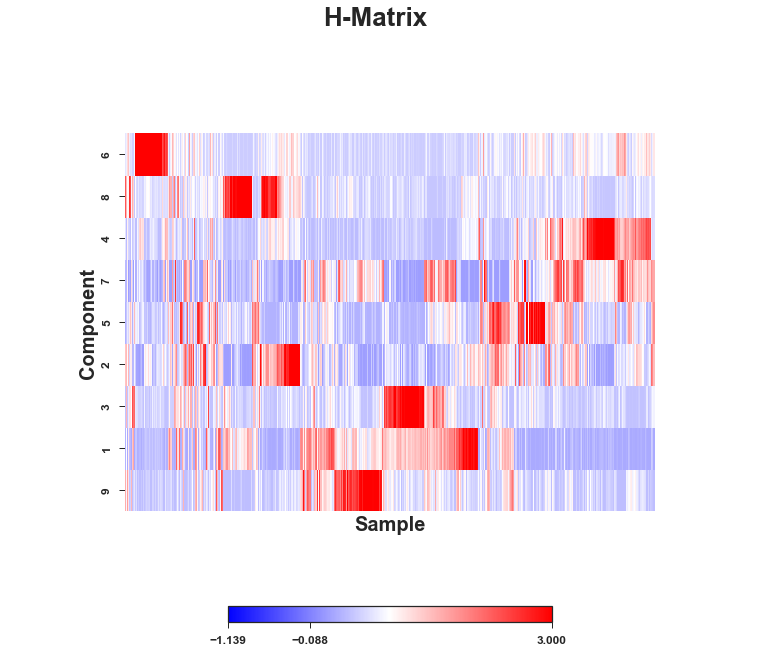

In [74]:
ccal.plot_heatmap(h_matrix, data_type='continuous', normalization_method='-0-', 
                  normalization_axis=1, cluster=True, title='H-Matrix', xlabel='Sample', 
                  ylabel='Component', xticklabels=False)

In [4]:
ccal.write_gct(braf_mutant_h_matrix, '../results/nmf/matrices/braf_mutant_h_matrix.gct')

In [38]:
h_matrix

A101D_SKIN  A172_CENTRAL_NERVOUS_SYSTEM  A204_SOFT_TISSUE   A2058_SKIN  \
1    87.390561                    93.350830        393.899758   255.625865   
3   518.647456                     7.308027        199.238501   176.804193   
9    11.208338                   622.861218        717.757144     3.069694   
8   239.003422                   479.108337        693.482964   478.286114   
6  7166.174137                  1208.779409       1774.414891  6276.135642   
7  1016.009451                  1672.966975        433.423134   955.066087   
5   764.479691                   725.646766        517.555359   459.776995   
2    64.829650                  1569.836315       3713.903057  1189.301135   
4  1048.429865                  3514.982837       1599.533720   949.324498   

   A2780_OVARY    A375_SKIN  A498_KIDNEY     A549_LUNG    A673_BONE  \
1    12.230046   125.904286    15.489376  5.201425e-08     0.163371   
3   545.601644   391.325939   452.722609  8.167350e+02   444.891880   
9   446.187704     0.000439   740.861040  6.040093e+02   975.677929   
8  1696.595193   503.049222   269.120017  6.510322e+02  2021.718516   
6  1362.720325  4779.659070   838.082289  8.212941e-03  1611.742127   
7     0.003192  1688.565623   961.965537  1.294276e+03    45.169949   
5     0.000010     0.112397  4271.867752  3.473658e+03    23.952947   
2  4612.165638  1692.563251  1041.812928  2.293922e+03  2825.029588   
4  1395.774975  1317.373754  1505.001742  8.602564e+02  2186.326459   

   A704_KIDNEY      ...          WM88_SKIN  WM983B_SKIN  YAPC_PANCREAS  \
1     0.001205      ...         415.948914   305.351132    2248.563800   
3  1664.636732      ...         295.629218   559.708338    2155.739326   
9     1.341833      ...         463.865834   118.997647    1890.725829   
8   372.320844      ...         363.270689   482.473882      14.761625   
6  1417.850903      ...        7112.681988  7116.940554     543.418521   
7    28.547109      ...         156.910209   617.164602    2113.148083   
5  5576.769071      ...         952.997119   568.321975     719.250074   
2   777.419387      ...         737.636509   493.994389     220.968519   
4   488.753903      ...         427.337725   656.160837       0.500336   

   YD10B_UPPER_AERODIGESTIVE_TRACT  YD38_UPPER_AERODIGESTIVE_TRACT  \
1                       685.682262                     1798.525914   
3                       355.439796                      302.706434   
9                      5669.601718                     3901.938851   
8                       512.785549                      401.354229   
6                       209.558478                      493.361221   
7                      1606.060845                     2266.279767   
5                         2.775659                      541.816602   
2                       436.847693                      112.120030   
4                       580.722452                      129.765634   

   YD8_UPPER_AERODIGESTIVE_TRACT  YH13_CENTRAL_NERVOUS_SYSTEM  \
1                     104.278153                   199.214356   
3                       0.000576                   328.560693   
9                    3309.332406                   600.933737   
8                      23.818909                   445.879251   
6                      24.717198                  1032.356299   
7                    1820.623602                  1502.274660   
5                    1600.013238                   509.370896   
2                     474.166240                   277.577697   
4                    2539.073702                  4918.553670   

   YKG1_CENTRAL_NERVOUS_SYSTEM  ZR751_BREAST  ZR7530_BREAST  
1                 3.819411e-01   4721.947367    4957.456757  
3                 1.112408e+02    357.322949     653.472173  
9                 1.969634e-10    457.725732     272.206384  
8                 9.487706e+02    942.540098     814.310434  
6                 2.382286e+03    285.983913     146.797171  
7                 1.324849e+03      0.016081   

#### 4.2 Display BRAF mut samples

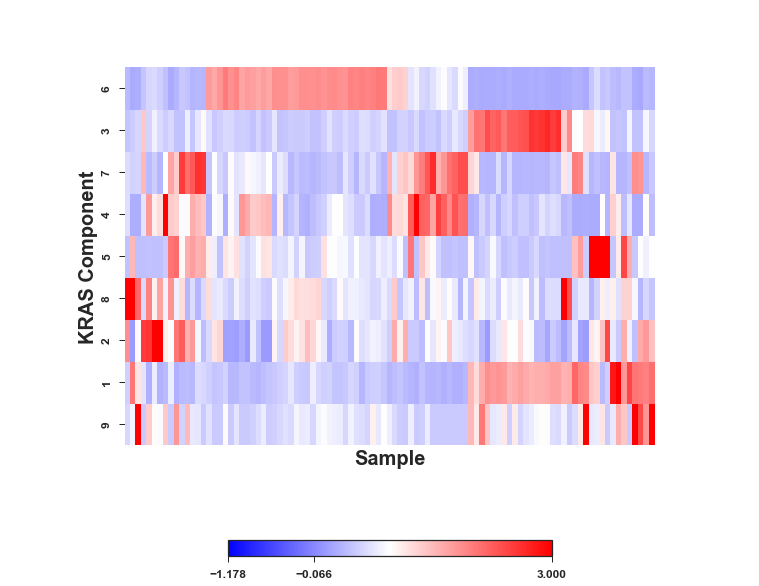

In [75]:
ccal.plot_heatmap(normalization_method='-0-', normalization_axis=1, dataframe = braf_mutant_h_matrix, cluster=True,
                              xlabel = 'Sample', ylabel = 'KRAS Component', xticklabels = False)

### 5. Compare the KRAS components against each other in the BRAF mutant samples

This is Fig S9 in the article.

[2017-03-10 20:07:11] Computing associations (axis=1) between matrices (0/9) ...
[2017-03-10 20:07:11] Computing associations (axis=1) between matrices (1/9) ...
[2017-03-10 20:07:11] Computing associations (axis=1) between matrices (2/9) ...
[2017-03-10 20:07:11] Computing associations (axis=1) between matrices (3/9) ...
[2017-03-10 20:07:11] Computing associations (axis=1) between matrices (4/9) ...
[2017-03-10 20:07:11] Computing associations (axis=1) between matrices (5/9) ...
[2017-03-10 20:07:11] Computing associations (axis=1) between matrices (6/9) ...
[2017-03-10 20:07:11] Computing associations (axis=1) between matrices (7/9) ...
[2017-03-10 20:07:11] Computing associations (axis=1) between matrices (8/9) ...


1         3         9         8         6         7         5  \
1  0.994839  0.801253  0.732435  0.589391 -0.753312 -0.545886 -0.534240   
3  0.801253  0.947790  0.330773 -0.361143 -0.562689 -0.376570 -0.443171   
9  0.732435  0.330773  0.981370  0.452516 -0.483094 -0.373976 -0.360161   
8  0.589391 -0.361143  0.452516  0.989692 -0.347279 -0.344664 -0.427789   
6 -0.753312 -0.562689 -0.483094 -0.347279  0.958389 -0.523332 -0.445330   
7 -0.545886 -0.376570 -0.373976 -0.344664 -0.523332  0.973028  0.411965   
5 -0.534240 -0.443171 -0.360161 -0.427789 -0.445330  0.411965  0.978456   
2 -0.500166 -0.319327  0.449977  0.517610 -0.324046 -0.204259  0.379797   
4 -0.714160 -0.463636 -0.450964 -0.369359 -0.387087  0.645631 -0.292540   

          2         4  
1 -0.500166 -0.714160  
3 -0.319327 -0.463636  
9  0.449977 -0.450964  
8  0.517610 -0.369359  
6 -0.324046 -0.387087  
7 -0.204259  0.645631  
5  0.379797 -0.292540  
2  0.987702  0.262522  
4  0.262522  0.977246

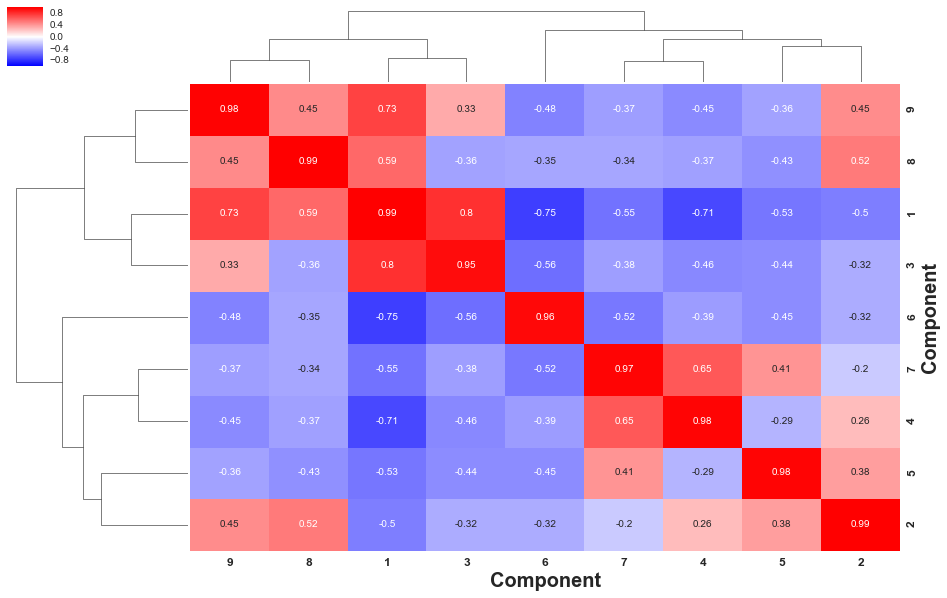

In [6]:
ccal.association.make_comparison_panel(matrix1 = braf_mutant_h_matrix, 
                                                                             matrix2 = braf_mutant_h_matrix,
                                                                             axis = 1, 
                                                                             matrix1_label = 'Component', 
                                                                             matrix2_label = 'Component')

As described in the analysis overview, we can see in the association matrix above that in those samples (BRAF mut) the components cluster into three major groups: 6-2, 8-9-3-1, 5-7-4.   This means that we can use 3 representative components (C6, C7 and C3) to define BRAF mut relevant oncogenic states and Onco-*GPS* map.

### 6. Select the BRAF mutants samples in the subset of C6, C7 and C3 components.

In [7]:
braf_h_matrix = braf_mutant_h_matrix.ix[[ 7, 3, 6], :]

### 6. Define the Oncogenic States
This function performs the clustering of the KRAS $H$ matrix to define oncogenic states.

[2017-03-10 20:07:12] Computing distances between samples, making a distance matrix ...
[2017-03-10 20:07:12] Computing associations (axis=0) between matrices (0/97) ...
[2017-03-10 20:07:12] Computing associations (axis=0) between matrices (1/97) ...
[2017-03-10 20:07:12] Computing associations (axis=0) between matrices (2/97) ...
[2017-03-10 20:07:12] Computing associations (axis=0) between matrices (3/97) ...
[2017-03-10 20:07:12] Computing associations (axis=0) between matrices (4/97) ...
[2017-03-10 20:07:13] Computing associations (axis=0) between matrices (5/97) ...
[2017-03-10 20:07:13] Computing associations (axis=0) between matrices (6/97) ...
[2017-03-10 20:07:13] Computing associations (axis=0) between matrices (7/97) ...
[2017-03-10 20:07:13] Computing associations (axis=0) between matrices (8/97) ...
[2017-03-10 20:07:13] Computing associations (axis=0) between matrices (9/97) ...
[2017-03-10 20:07:13] Computing associations (axis=0) between matrices (10/97) ...
[2017-03-

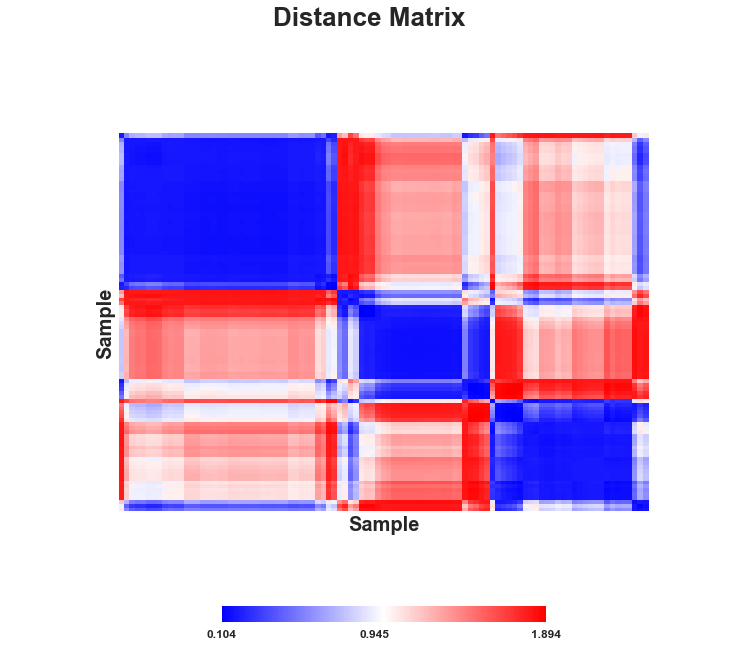

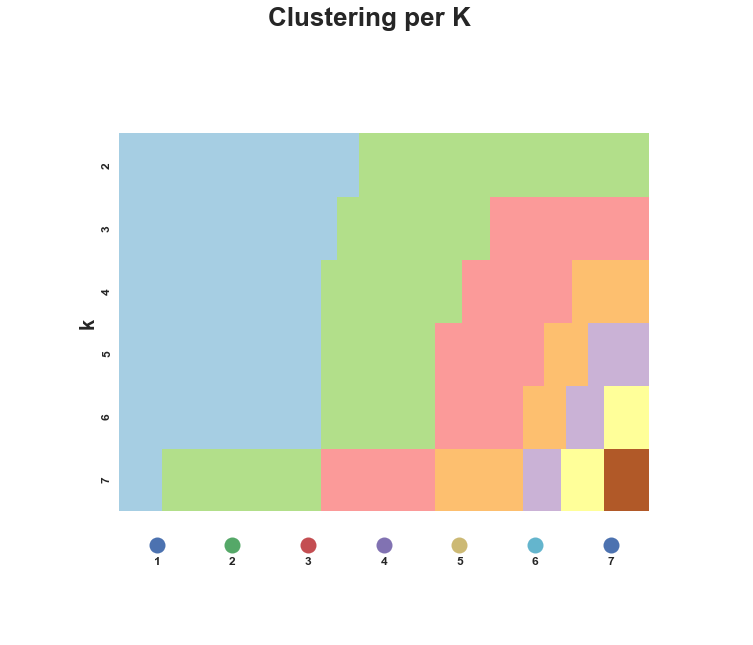

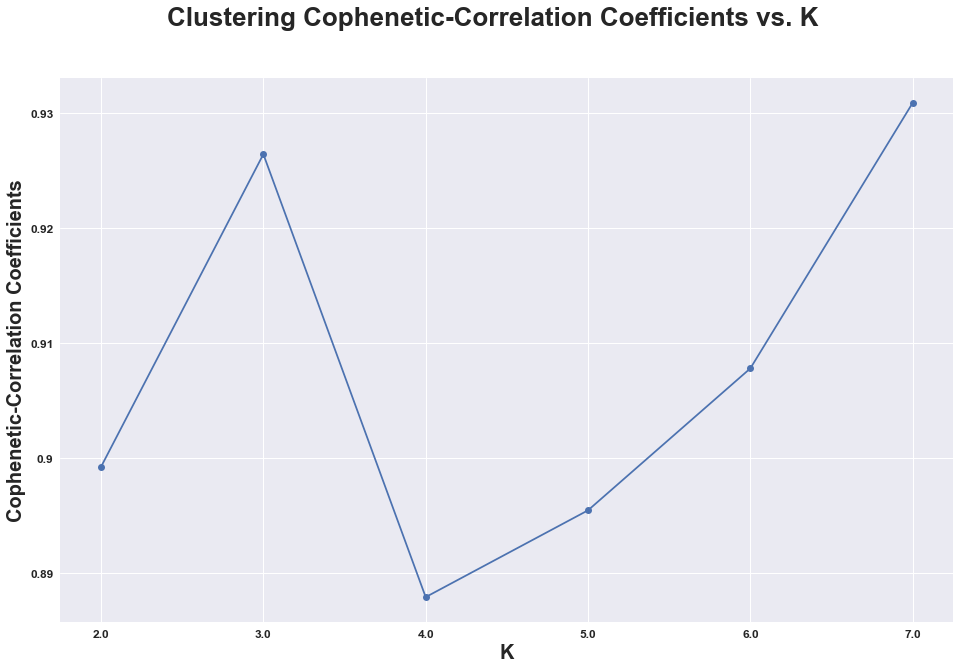

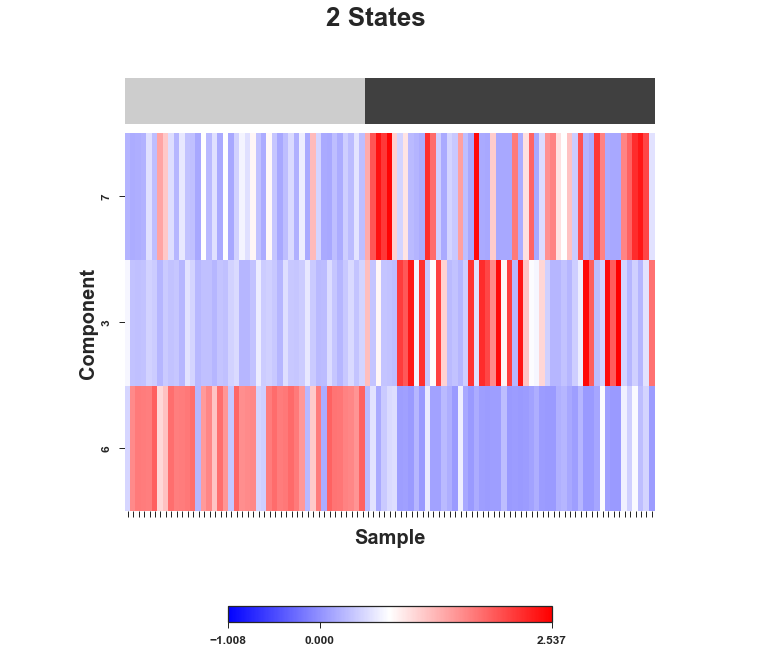

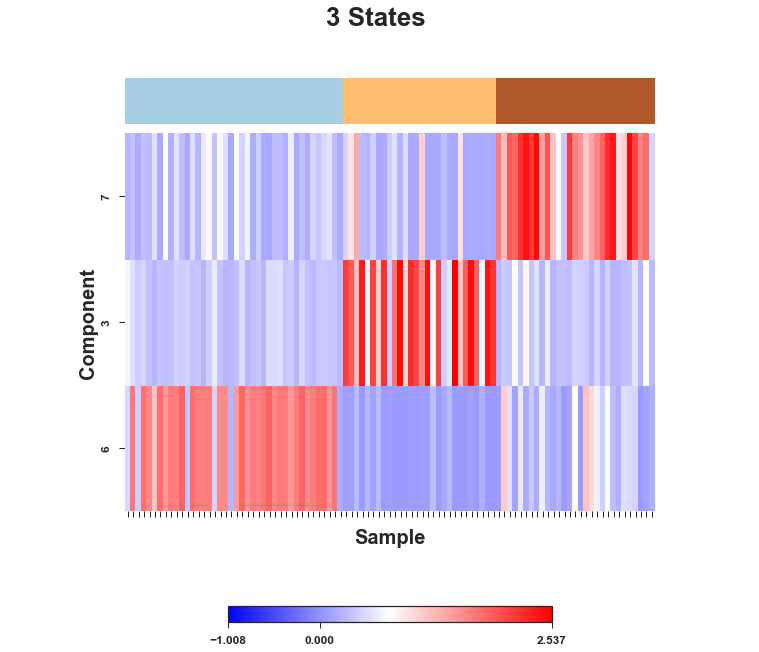

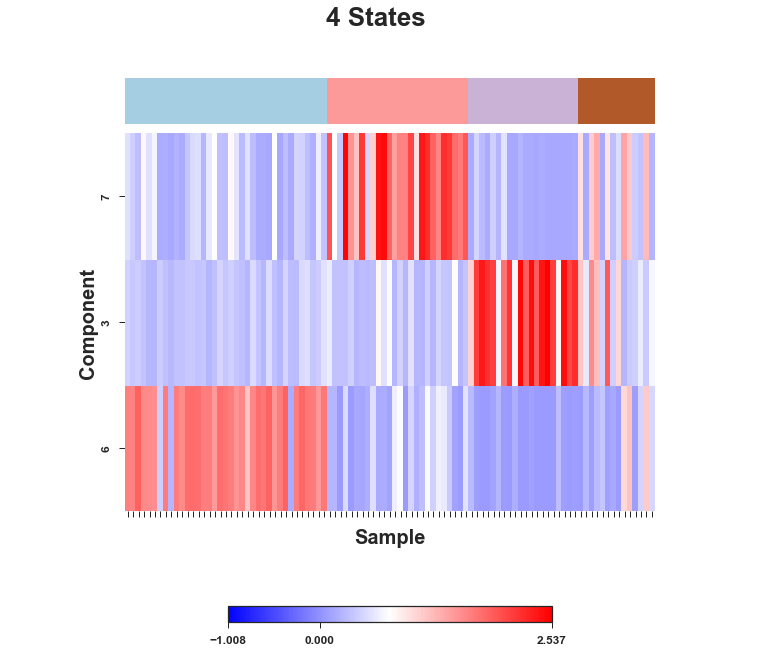

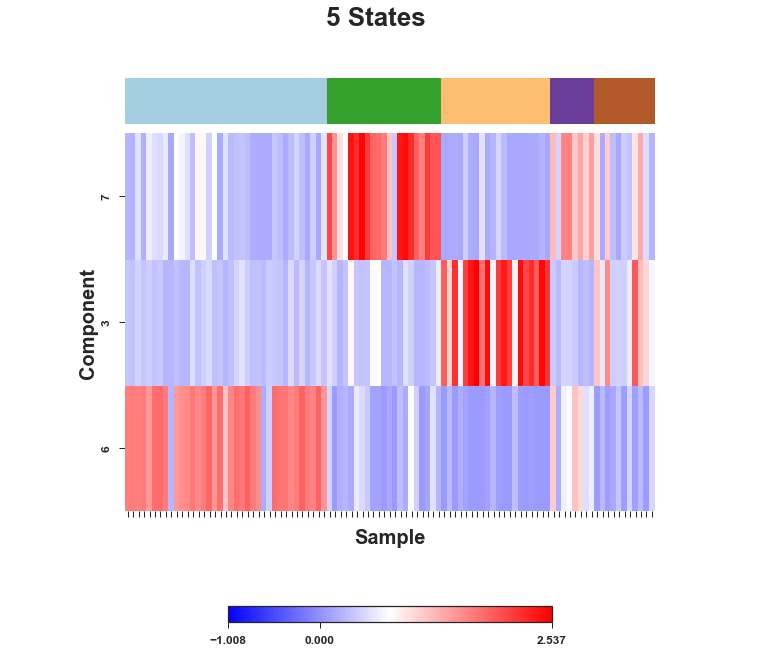

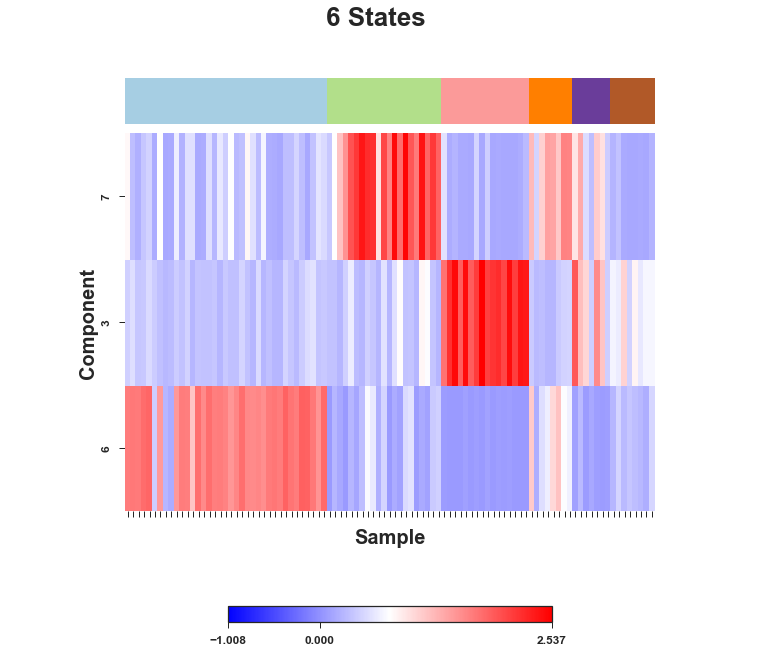

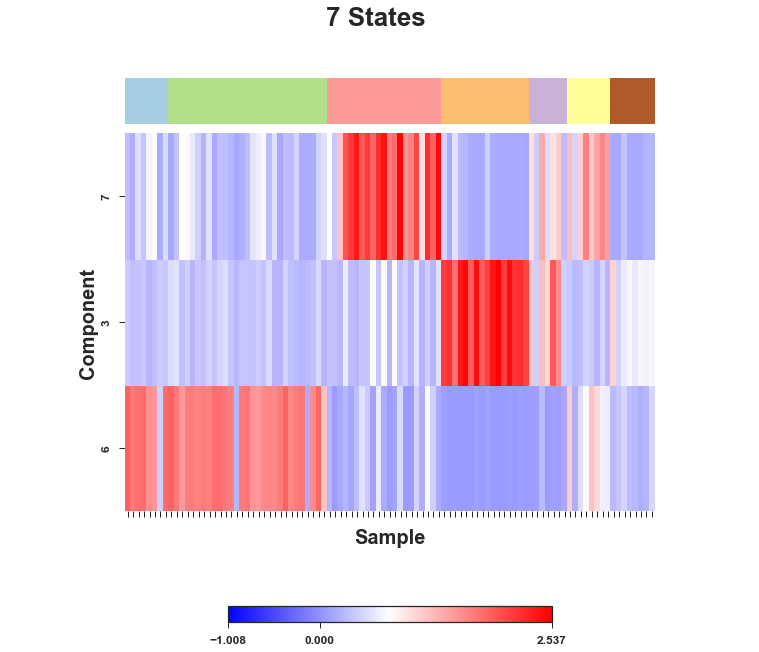

In [8]:
braf_dist_matrix, braf_clusterings, braf_cophen_coeff = ccal.oncogps.define_states(matrix = braf_h_matrix,
                                                                                                                                                       ks = range(2, 8), 
                                                                                                                                                       max_std=3, n_clusterings = 30,
                                                                                                                                                       random_seed = 8149, 
                                                                                                                                                       directory_path='../results/BRAF')

As we can see in the cophenetic coefficient plot above there is a solution for k=3 states. We will select this number and make a heatmap and the corresponding Onco-*GPS* below.

### 7. Make a heatmap of the selected (k=3) states

#### 7.1 Select the state labels for the k=3 oncogenic states

In [9]:
binary_labels = ccal.support.d1.explode_series(braf_clusterings.ix[3, :])
ccal.write_gct(binary_labels, '../results/clusterings/clusterings_k3.gct')
braf_sample_labels = braf_clusterings.ix[3, :]

Relabeled states to have same labeling as in the original submission/analysis

In [10]:
relabeling = [1, 3,2]
for i in range(len(braf_sample_labels )):
            braf_sample_labels.ix[i] = relabeling[braf_sample_labels.ix[i] - 1]       

#### 7.2 Produce heatmap of BRAF mutant samples and their memebrship in each state (this is Fig S10 in the article)

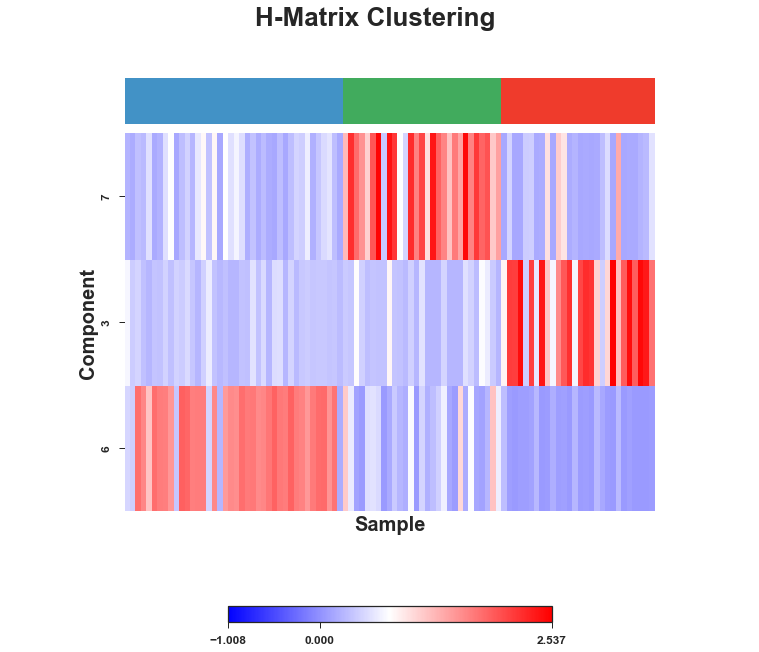

In [11]:
ccal.plot_heatmap(dataframe = braf_h_matrix, 
                                  annotation_colors = [blue, green, red],
                                  data_type = 'continuous', 
                                  normalization_method = '-0-', 
                                  normalization_axis = 1,
                                  column_annotation = braf_sample_labels,
                                  title = 'H-Matrix Clustering',
                                  xlabel = 'Sample', 
                                  ylabel = 'Component', 
                                  xticklabels = False)

### 8. Generate the BRAF mut Onco-GPS map 
This function generates the Onco-*GPS* that we featured in the article and that we will use in the next notebooks. This is Fig 7A in the article.

[2017-03-10 20:07:43] Using equilateral-triangle component coordinates ...
[2017-03-10 20:07:43] Computing training sample coordinates using 3 components and 1.000 power ...
[2017-03-10 20:07:43] Computing state grids and probabilities ...
[2017-03-10 20:07:43] Plotting ...


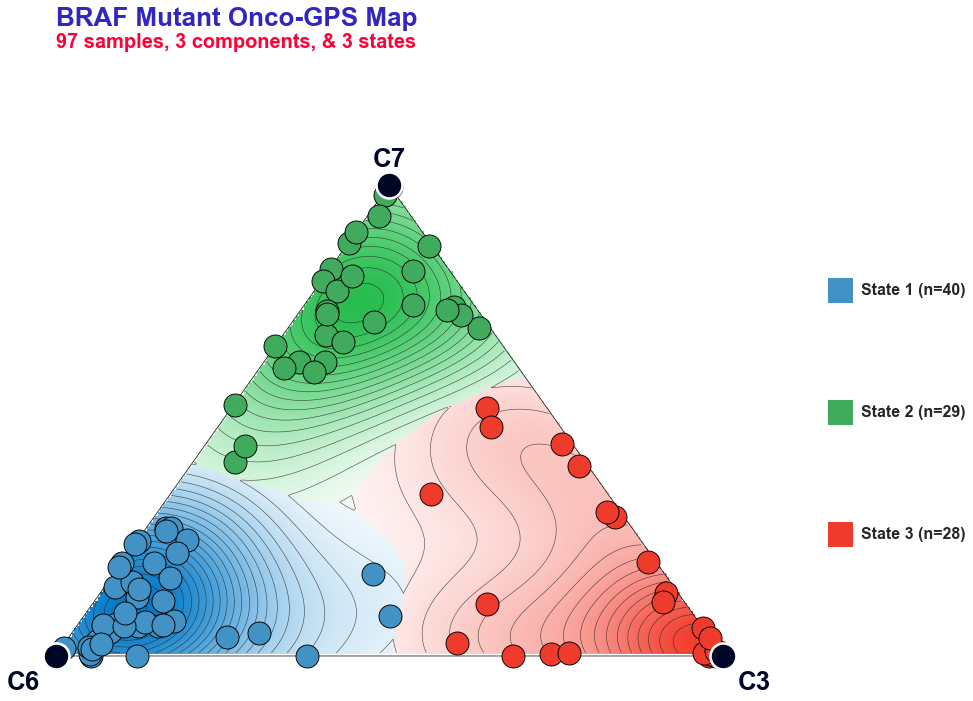

In [12]:
ccal.oncogps.make_oncogps(training_h=braf_h_matrix, 
                                                     training_states=braf_sample_labels,
                                                     title='BRAF Mutant Onco-GPS Map',
                                                     equilateral=True,
                                                     legend_markersize=25,
                                                     state_colors=[blue,green, red],
                                                     power = 1,
                                                     kde_bandwidth_factor=0.8,
                                                     component_names=["C7","C3","C6"],
                                                     std_max=2)
                                                     #filepath=join(DIR_RESULT,'KRAS_Onco-GPS.pdf'))

[2017-03-10 20:07:44] Using equilateral-triangle component coordinates ...
[2017-03-10 20:07:44] Computing training sample coordinates using 3 components and 1.000 power ...
[2017-03-10 20:07:44] Computing state grids and probabilities ...
[2017-03-10 20:07:44] Plotting ...
[2017-03-10 20:07:48] Using equilateral-triangle component coordinates ...
[2017-03-10 20:07:48] Computing training sample coordinates using 3 components and 1.000 power ...
[2017-03-10 20:07:48] Computing state grids and probabilities ...
[2017-03-10 20:07:48] Plotting ...
[2017-03-10 20:07:51] Using equilateral-triangle component coordinates ...
[2017-03-10 20:07:51] Computing training sample coordinates using 3 components and 1.000 power ...
[2017-03-10 20:07:51] Computing state grids and probabilities ...
[2017-03-10 20:07:51] Plotting ...


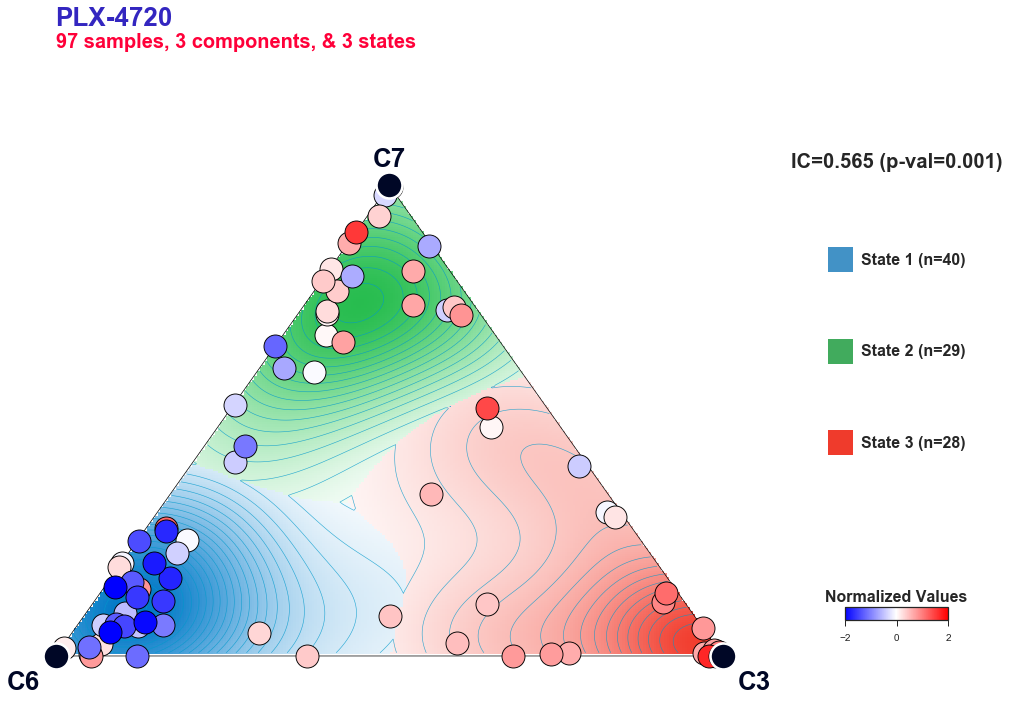

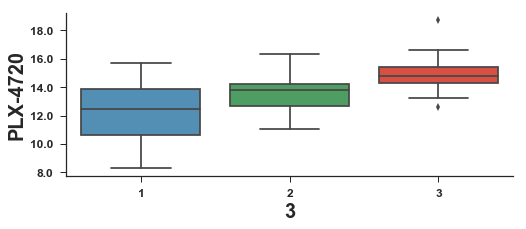

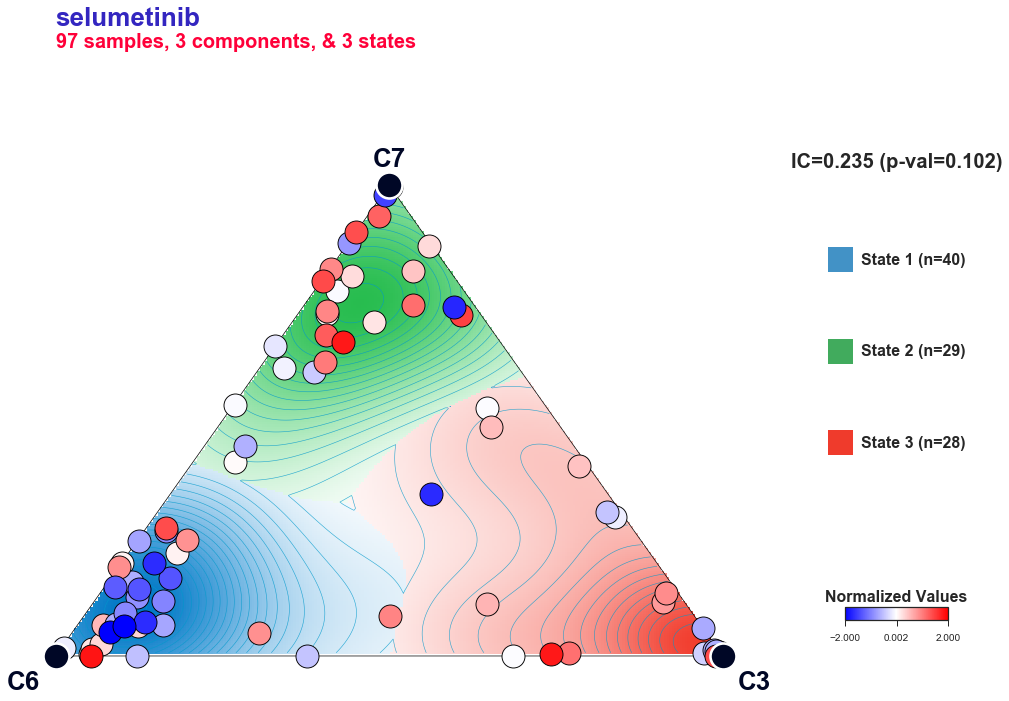

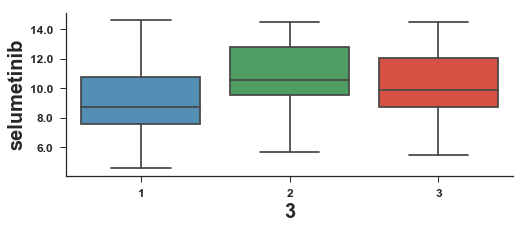

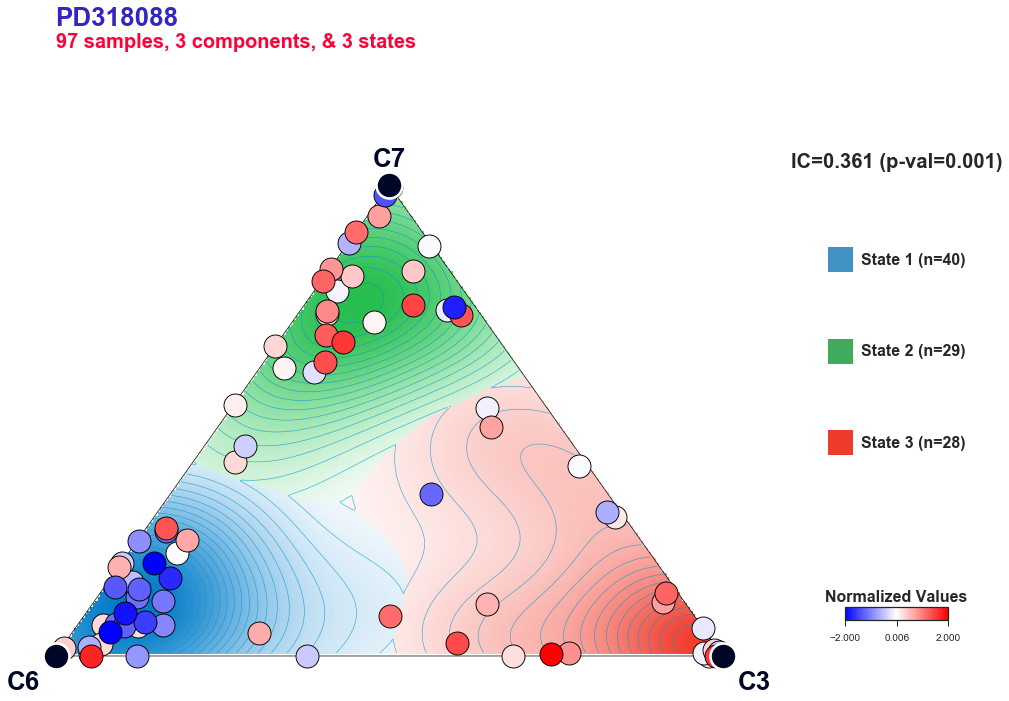

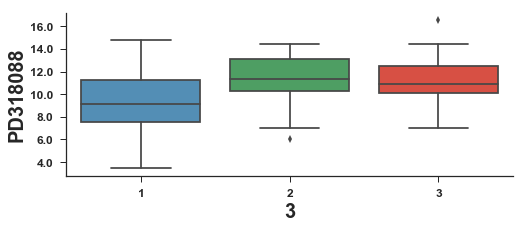

In [13]:
for i, alias in [('PLX-4720','PLX-4720'),
                        ('selumetinib', 'selumetinib'),
                        ('PD318088', 'PD318088')]:

    annotation = drug_sensitivity_df.ix[i, :]
    annotation.name = alias

    ccal.oncogps.make_oncogps(training_h=braf_h_matrix, 
                              training_states=braf_sample_labels, 
                              training_annotation=annotation,
                              title=annotation.name,
                              equilateral=True,
                              legend_markersize=25,
                              state_colors=[blue, green, red],
                              power = 1,
                              kde_bandwidth_factor=0.8,
                              contour_linecolor=light_blue,
                              component_names = ["C7", "C3", "C6"],
                              std_max = 2)
                              #filepath=join(DIR_RESULT, 'BRAS_Onco-GPS_Feature_{}.pdf'.format(annotation.name)))
        
    ccal.plot_violin_box_or_bar(braf_sample_labels, annotation.ix[braf_sample_labels.index], colors=[blue, green, red],
                                                        violin_or_box='box', figure_size=(8,3))

[2017-03-10 20:07:57] Using equilateral-triangle component coordinates ...
[2017-03-10 20:07:57] Computing training sample coordinates using 3 components and 1.000 power ...
[2017-03-10 20:07:57] Computing state grids and probabilities ...
[2017-03-10 20:07:57] Plotting ...
[2017-03-10 20:08:00] Using equilateral-triangle component coordinates ...
[2017-03-10 20:08:00] Computing training sample coordinates using 3 components and 1.000 power ...
[2017-03-10 20:08:00] Computing state grids and probabilities ...
[2017-03-10 20:08:00] Plotting ...
[2017-03-10 20:08:04] Using equilateral-triangle component coordinates ...
[2017-03-10 20:08:04] Computing training sample coordinates using 3 components and 1.000 power ...
[2017-03-10 20:08:04] Computing state grids and probabilities ...
[2017-03-10 20:08:04] Plotting ...
[2017-03-10 20:08:08] Using equilateral-triangle component coordinates ...
[2017-03-10 20:08:08] Computing training sample coordinates using 3 components and 1.000 power ...
[

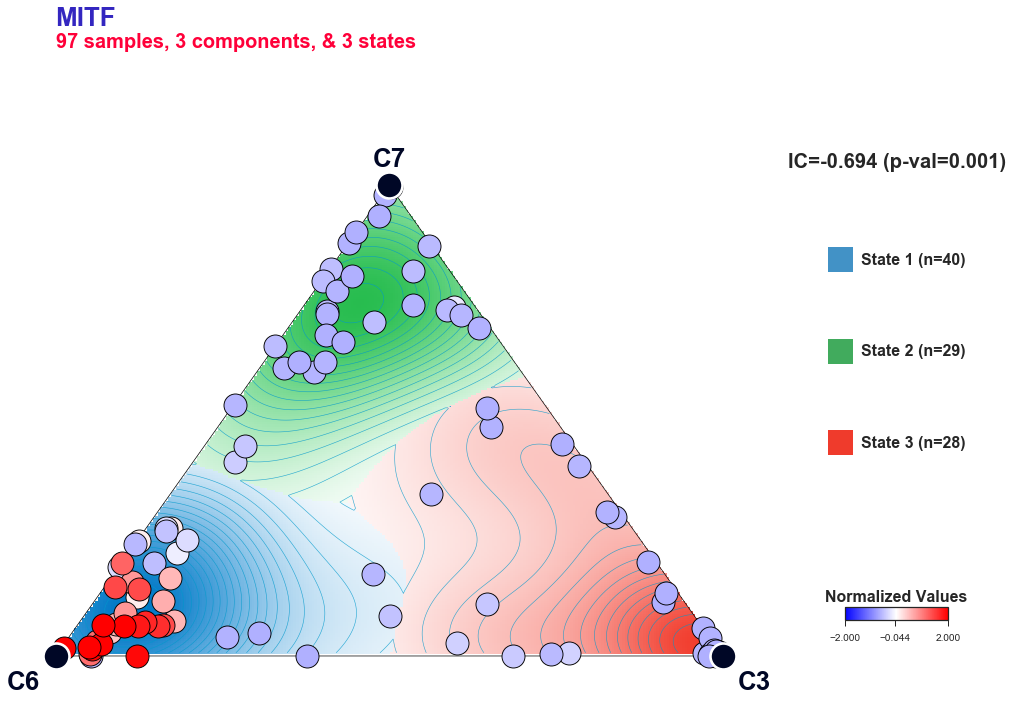

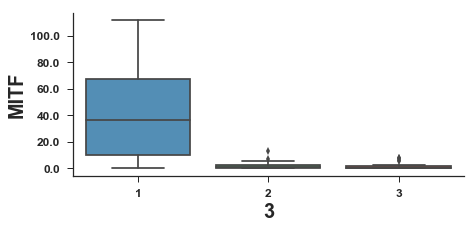

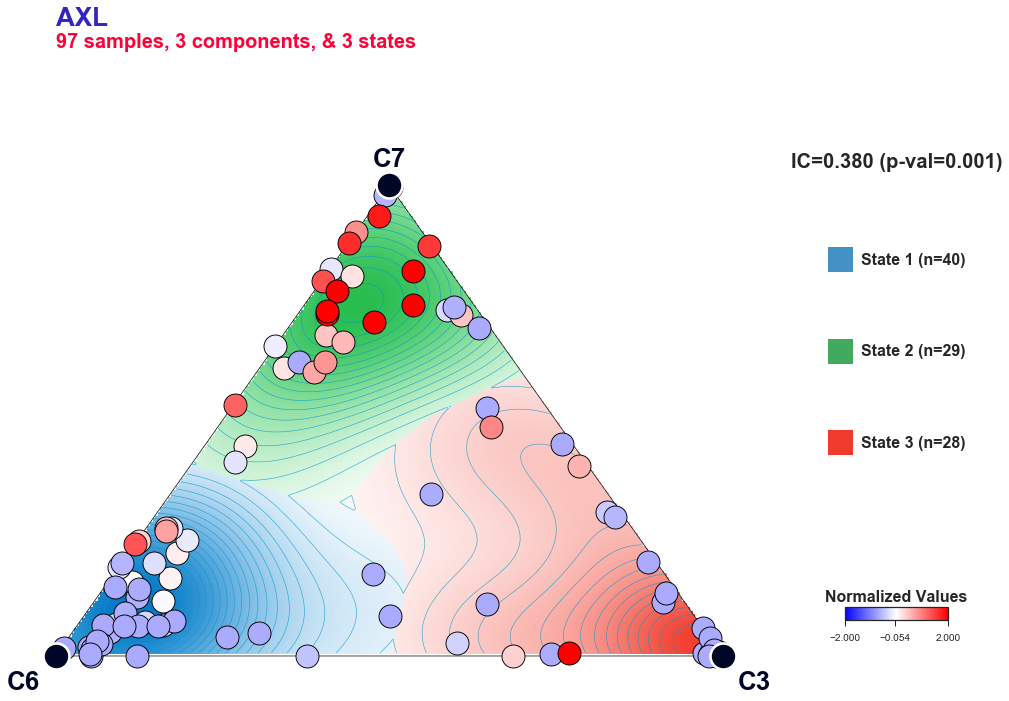

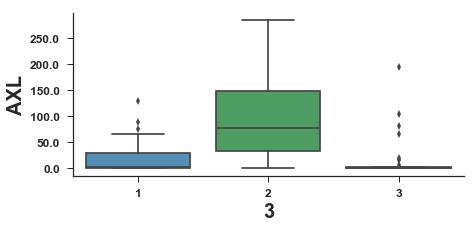

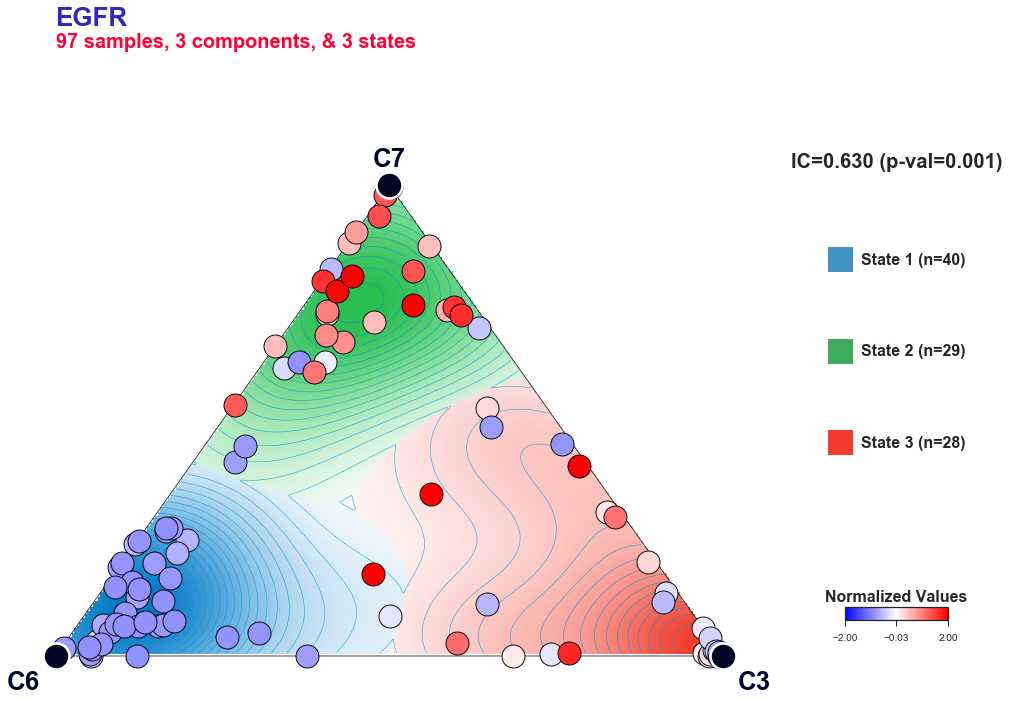

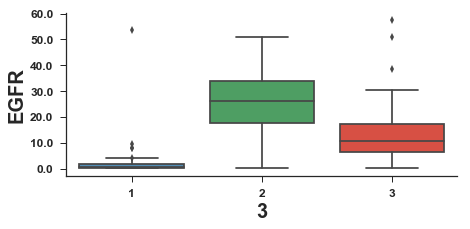

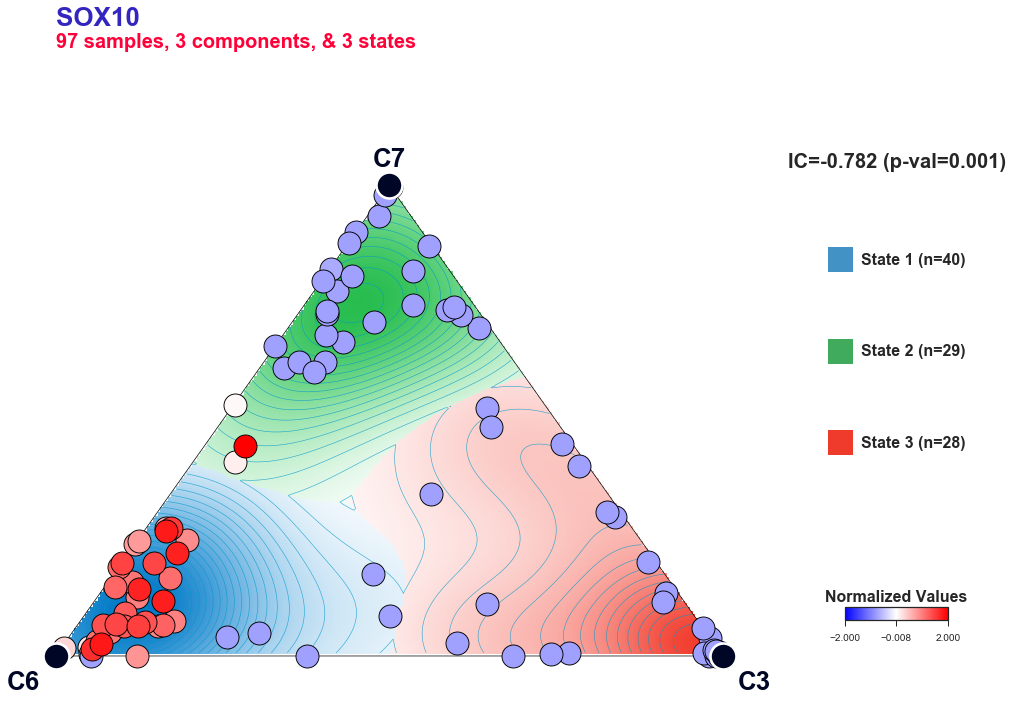

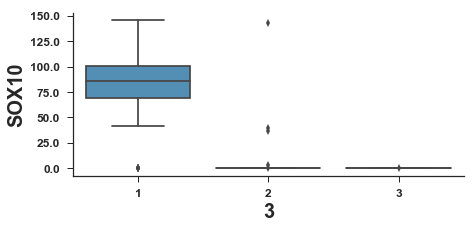

In [14]:
for i, alias in [('MITF', 'MITF'),
                        ('AXL', 'AXL'),
                        ('EGFR', 'EGFR'),               
                        ('SOX10', 'SOX10')]:

    annotation = gene_expression_df.ix[i, :]
    annotation.name = alias

    ccal.oncogps.make_oncogps(training_h=braf_h_matrix, 
                              training_states=braf_sample_labels, 
                              training_annotation=annotation,
                              title=annotation.name,
                              equilateral=True,
                              legend_markersize=25,
                              state_colors=[blue, green, red],
                              power = 1,
                              kde_bandwidth_factor=0.8,
                              contour_linecolor=light_blue,
                              component_names = ["C7", "C3", "C6"],
                              std_max = 2)
                              #filepath=join(DIR_RESULT, 'BRAS_Onco-GPS_Feature_{}.pdf'.format(annotation.name)))
        
    ccal.plot_violin_box_or_bar(braf_sample_labels, annotation.ix[braf_sample_labels.index], colors=[blue, green, red],
                                                        violin_or_box='box', figure_size=(7,3))        

[2017-03-10 20:08:13] Using equilateral-triangle component coordinates ...
[2017-03-10 20:08:13] Computing training sample coordinates using 3 components and 1.000 power ...
[2017-03-10 20:08:14] Computing state grids and probabilities ...
[2017-03-10 20:08:14] Plotting ...


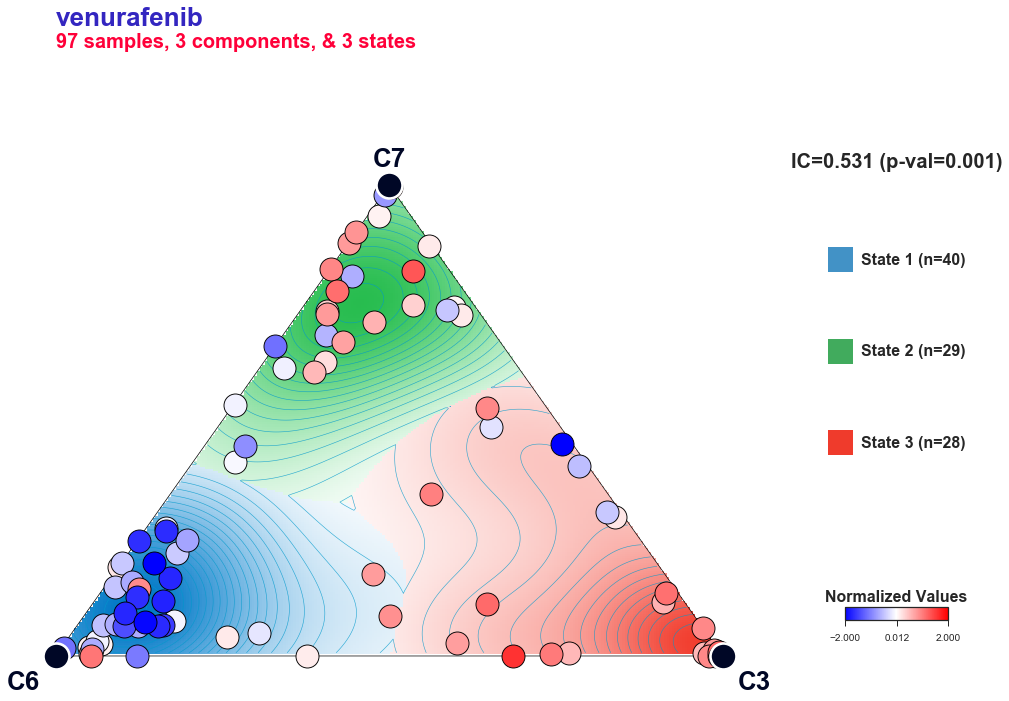

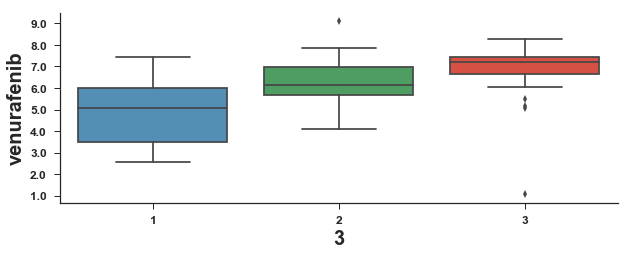

In [15]:
for i, alias in [('vemurafenib', 'venurafenib')]:

    annotation = drug_sensitivity2_df.ix[i, :]
    annotation.name = alias

    ccal.oncogps.make_oncogps(training_h=braf_h_matrix, 
                              training_states=braf_sample_labels, 
                              training_annotation=annotation,
                              title=annotation.name,
                              equilateral=True,
                              legend_markersize=25,
                              state_colors=[blue, green, red],
                              power = 1,
                              kde_bandwidth_factor=0.8,
                              contour_linecolor=light_blue,
                              component_names = ["C7", "C3", "C6"],
                              std_max = 2)
                              #filepath=join(DIR_RESULT, 'BRAS_Onco-GPS_Feature_{}.pdf'.format(annotation.name)))
        
    ccal.plot_violin_box_or_bar(braf_sample_labels, annotation.ix[braf_sample_labels.index], colors=[blue, green, red],
                                                        violin_or_box='box', figure_size=(10,3.5))

[2017-03-10 20:08:18] Using equilateral-triangle component coordinates ...
[2017-03-10 20:08:18] Computing training sample coordinates using 3 components and 1.000 power ...
[2017-03-10 20:08:18] Computing state grids and probabilities ...
[2017-03-10 20:08:18] Plotting ...


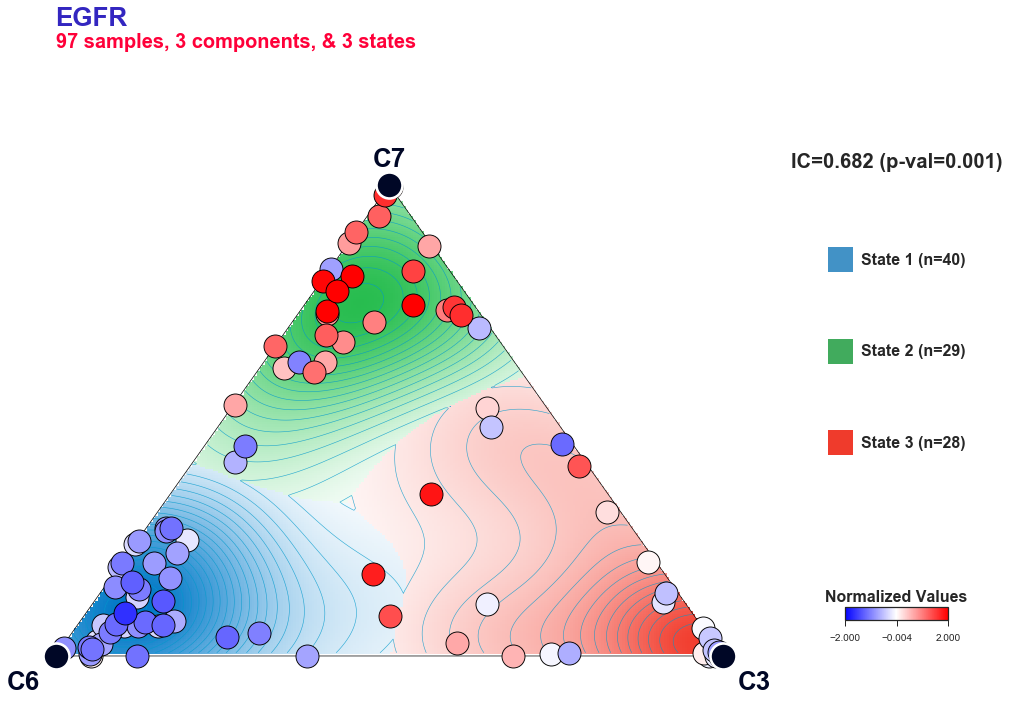

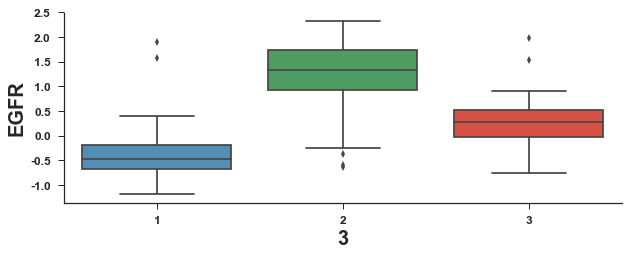

In [16]:
for i, alias in [('EGFR-R-V', 'EGFR')]:

    annotation = protein_expression_df.ix[i, :]
    annotation.name = alias

    ccal.oncogps.make_oncogps(training_h=braf_h_matrix, 
                              training_states=braf_sample_labels, 
                              training_annotation=annotation,
                              title=annotation.name,
                              equilateral=True,
                              legend_markersize=25,
                              state_colors=[blue, green, red],
                              power = 1,
                              kde_bandwidth_factor=0.8,
                              contour_linecolor=light_blue,
                              component_names = ["C7", "C3", "C6"],
                              std_max = 2)
                              #filepath=join(DIR_RESULT, 'BRAS_Onco-GPS_Feature_{}.pdf'.format(annotation.name)))
        
    ccal.plot_violin_box_or_bar(braf_sample_labels, annotation.ix[braf_sample_labels.index], colors=[blue, green, red],
                                                        violin_or_box='box', figure_size=(10,3.5))

<hr style="border: none; border-bottom: 1px solid #88BBEE;">
#### 7.3 Produce pathway-based heatmap of BRAF mutant samples

[2017-03-10 20:08:25] Computing distances between samples, making a distance matrix ...
[2017-03-10 20:08:25] Computing associations (axis=0) between matrices (0/110) ...
[2017-03-10 20:08:25] Computing associations (axis=0) between matrices (1/110) ...
[2017-03-10 20:08:25] Computing associations (axis=0) between matrices (2/110) ...
[2017-03-10 20:08:25] Computing associations (axis=0) between matrices (3/110) ...
[2017-03-10 20:08:25] Computing associations (axis=0) between matrices (4/110) ...
[2017-03-10 20:08:26] Computing associations (axis=0) between matrices (5/110) ...
[2017-03-10 20:08:26] Computing associations (axis=0) between matrices (6/110) ...
[2017-03-10 20:08:26] Computing associations (axis=0) between matrices (7/110) ...
[2017-03-10 20:08:26] Computing associations (axis=0) between matrices (8/110) ...
[2017-03-10 20:08:26] Computing associations (axis=0) between matrices (9/110) ...
[2017-03-10 20:08:26] Computing associations (axis=0) between matrices (10/110) ..

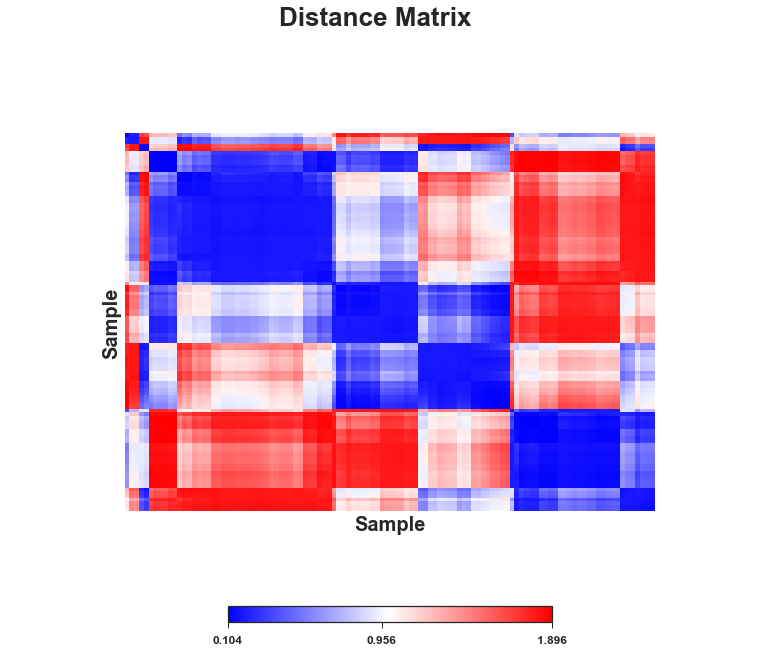

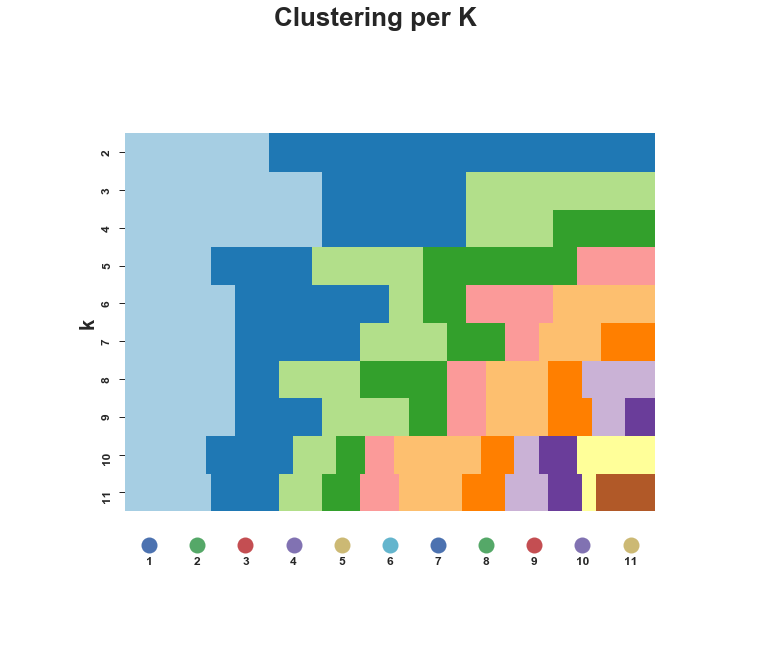

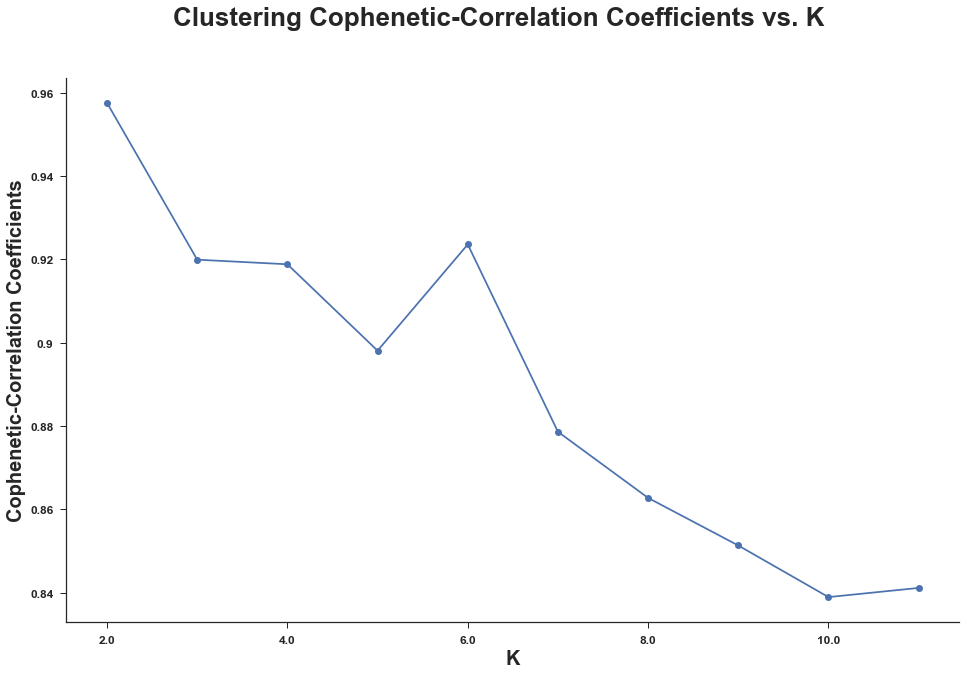

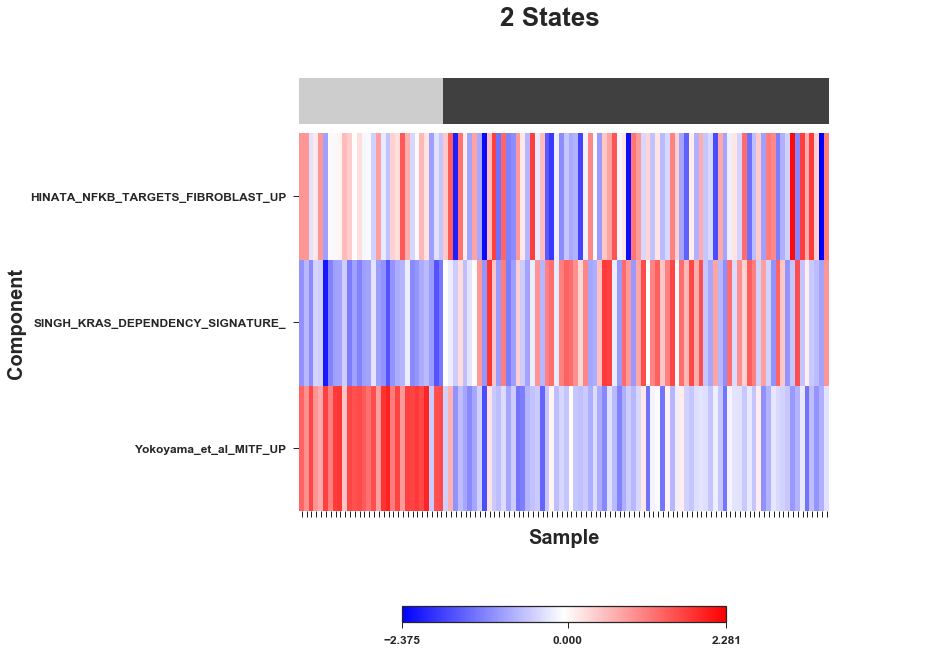

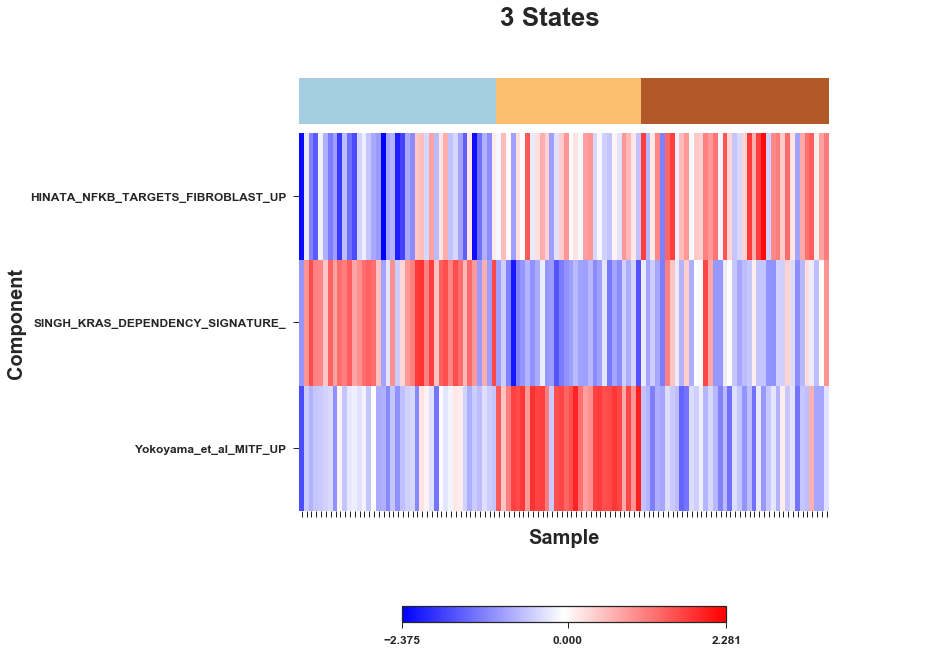

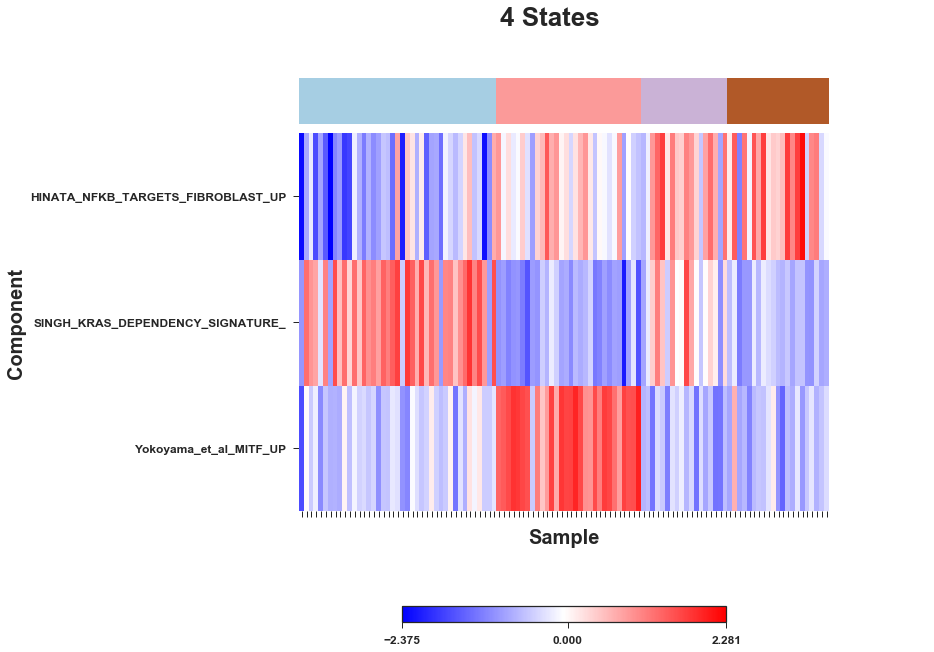

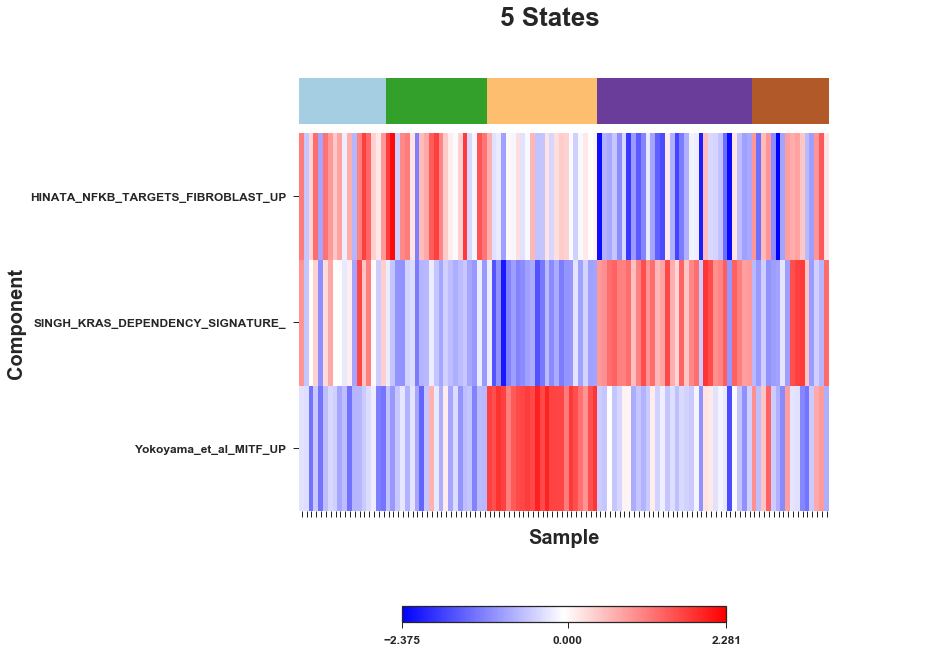

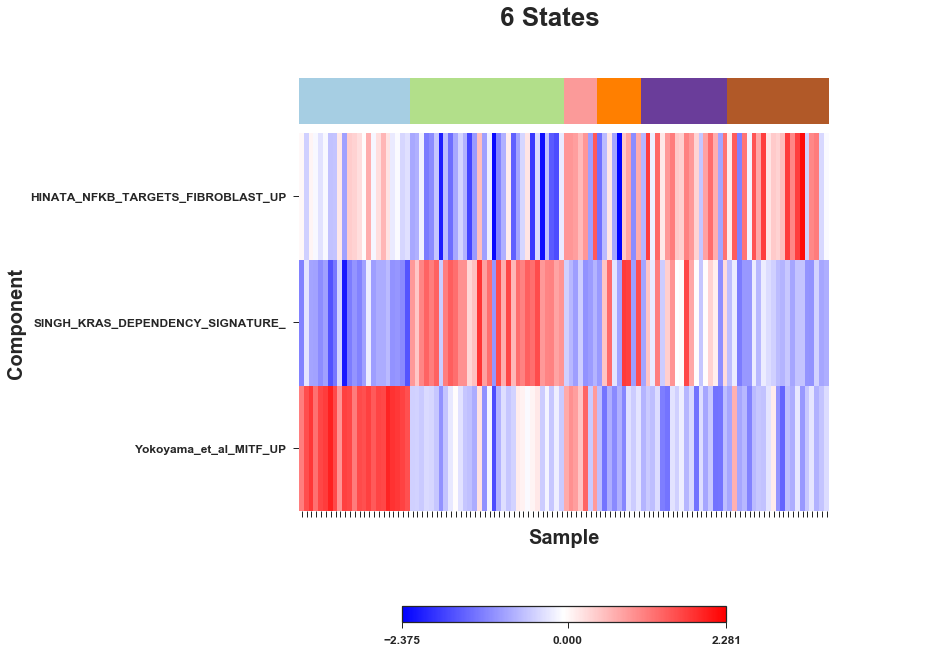

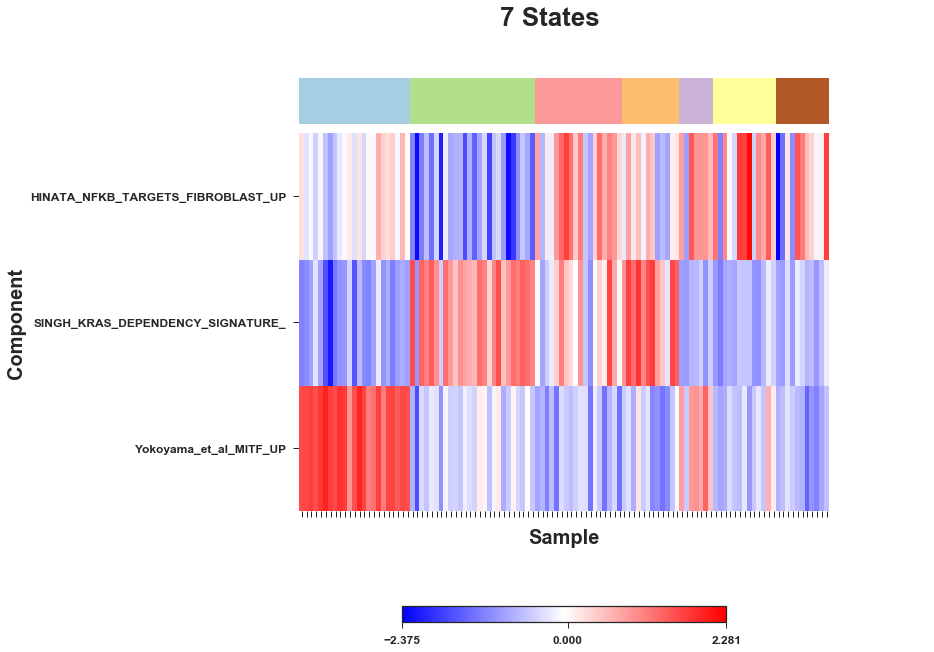

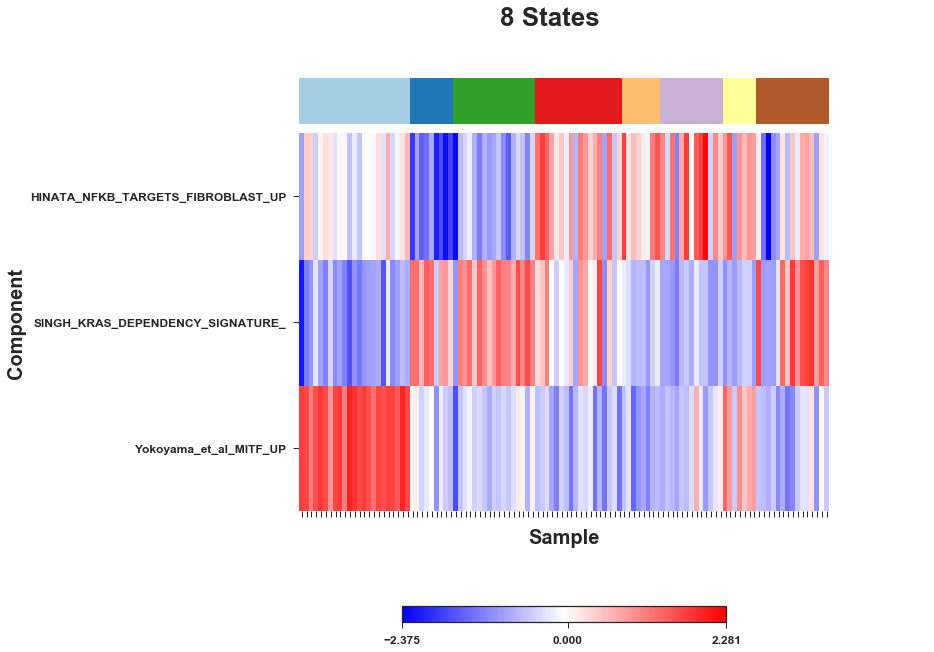

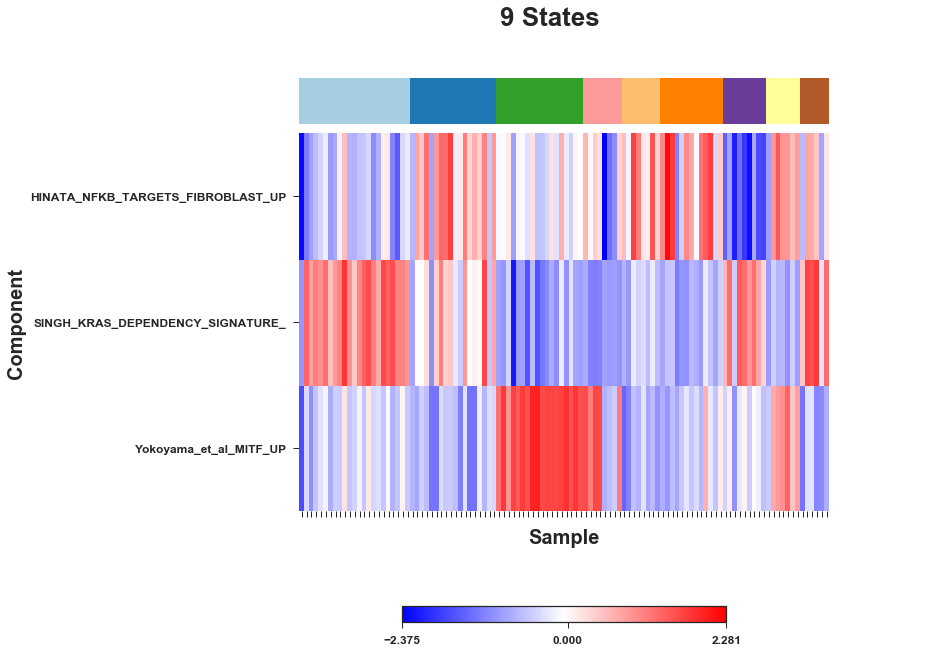

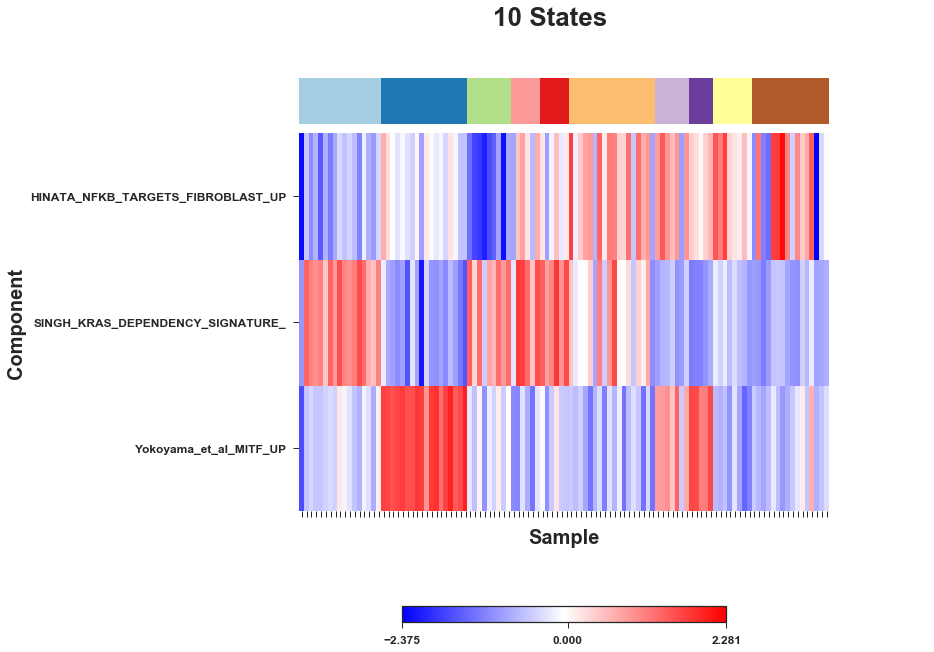

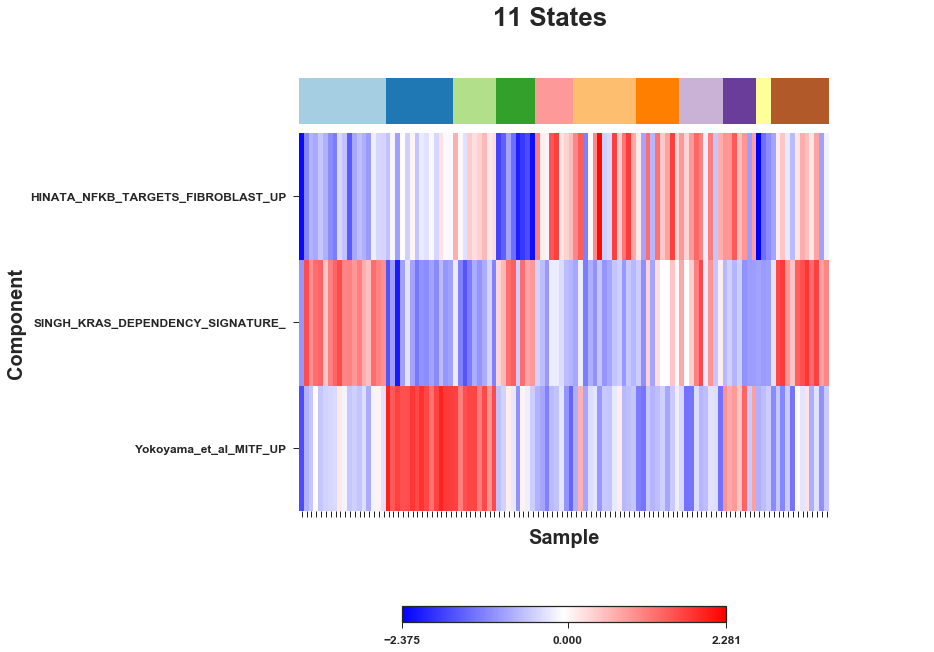

In [17]:
pathway_expression_df = ccal.read_gct('../data/CCLE.rpkm.PATHWAYS.v1.gct')

braf_mutants = mut_cna_df.columns[mut_cna_df.ix['BRAF_MUT', :].astype(bool)]
h_matrix = ccal.read_gct('../results/nmf/matrices/nmf_k9_h.gct')
braf_mutant_h_matrix = h_matrix.ix[:, h_matrix.columns & braf_mutants]

pathways = pathway_expression_df.ix[['HINATA_NFKB_TARGETS_FIBROBLAST_UP',
                                                                       'SINGH_KRAS_DEPENDENCY_SIGNATURE_',
                                                                       'Yokoyama_et_al_MITF_UP'], pathway_expression_df.columns & braf_mutants]

braf_path_dist_matrix, braf_path_clusterings, braf_path_cophen_coeff = ccal.oncogps.define_states(matrix = pathways,
                                                                                                                                                       ks = range(2, 12), 
                                                                                                                                                       max_std=3.25, 
                                                                                                                                                       random_seed = 7802,
                                                                                                                                                       directory_path='../results/BRAF/pathways/')

In [18]:
binary_path_labels = ccal.support.d1.explode_series(braf_path_clusterings.ix[3,:])
braf_path_sample_labels = braf_path_clusterings.ix[3,:]

relabeling = [3, 1, 2]
for i in range(len(braf_path_sample_labels)):
            braf_path_sample_labels.ix[i] = relabeling[braf_path_sample_labels.ix[i] - 1]

[2017-03-10 20:09:06] Using equilateral-triangle component coordinates ...
[2017-03-10 20:09:06] Computing training sample coordinates using 3 components and 2.000 power ...
[2017-03-10 20:09:06] Computing state grids and probabilities ...
[2017-03-10 20:09:06] Plotting ...


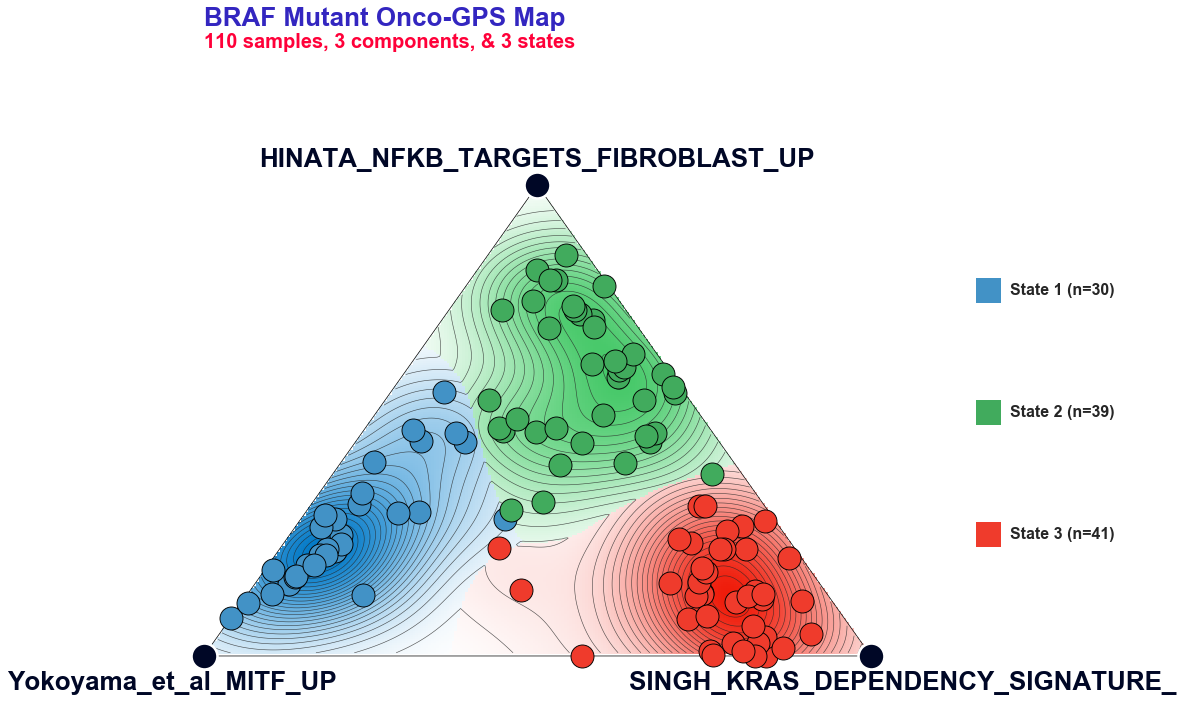

In [19]:
ccal.oncogps.make_oncogps(training_h=pathways, 
                                                     training_states=braf_path_sample_labels,
                                                     title='BRAF Mutant Onco-GPS Map',
                                                     equilateral=True,
                                                     legend_markersize=25,
                                                     state_colors=[blue, green, red],
                                                     power = 2,
                                                     kde_bandwidth_factor=0.8,
                                                     component_names=['HINATA_NFKB_TARGETS_FIBROBLAST_UP',
                                                                                           'SINGH_KRAS_DEPENDENCY_SIGNATURE_',
                                                                                           'Yokoyama_et_al_MITF_UP'],
                                                     std_max=2)
                                                     #filepath=join(DIR_RESULT, 'BRAF_Onco-GPS.PATHWAY_BASED.pdf'))

<hr style="border: none; border-bottom: 1px solid #88BBEE;">
#### 7.4 Produce protein-based heatmap of BRAF mutant samples

[2017-03-10 20:09:07] Computing distances between samples, making a distance matrix ...
[2017-03-10 20:09:07] Computing associations (axis=0) between matrices (0/106) ...
[2017-03-10 20:09:08] Computing associations (axis=0) between matrices (1/106) ...
[2017-03-10 20:09:08] Computing associations (axis=0) between matrices (2/106) ...
[2017-03-10 20:09:08] Computing associations (axis=0) between matrices (3/106) ...
[2017-03-10 20:09:08] Computing associations (axis=0) between matrices (4/106) ...
[2017-03-10 20:09:08] Computing associations (axis=0) between matrices (5/106) ...
[2017-03-10 20:09:08] Computing associations (axis=0) between matrices (6/106) ...
[2017-03-10 20:09:08] Computing associations (axis=0) between matrices (7/106) ...
[2017-03-10 20:09:09] Computing associations (axis=0) between matrices (8/106) ...
[2017-03-10 20:09:09] Computing associations (axis=0) between matrices (9/106) ...
[2017-03-10 20:09:09] Computing associations (axis=0) between matrices (10/106) ..

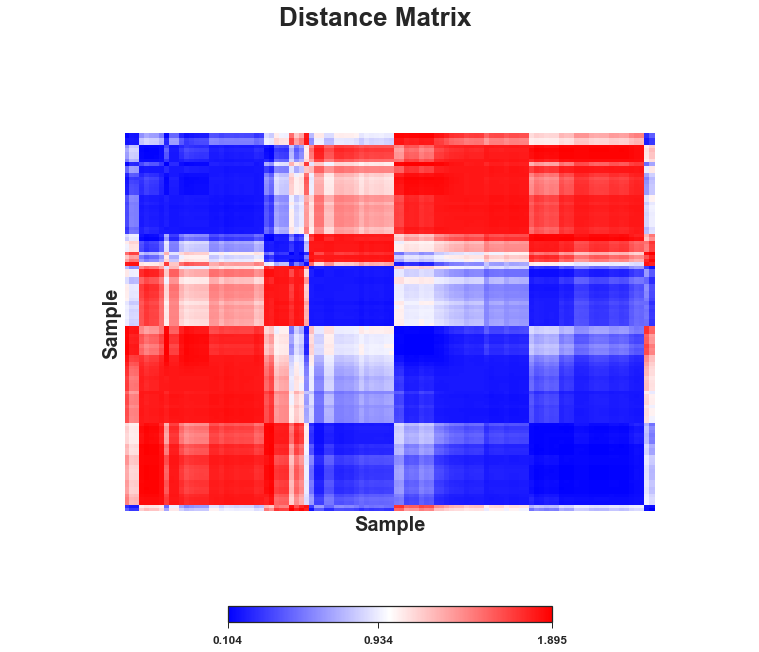

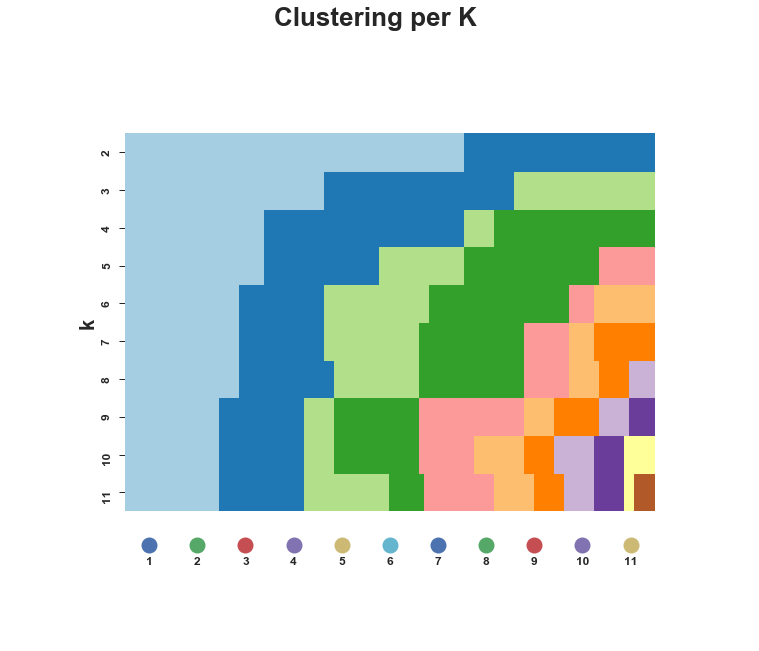

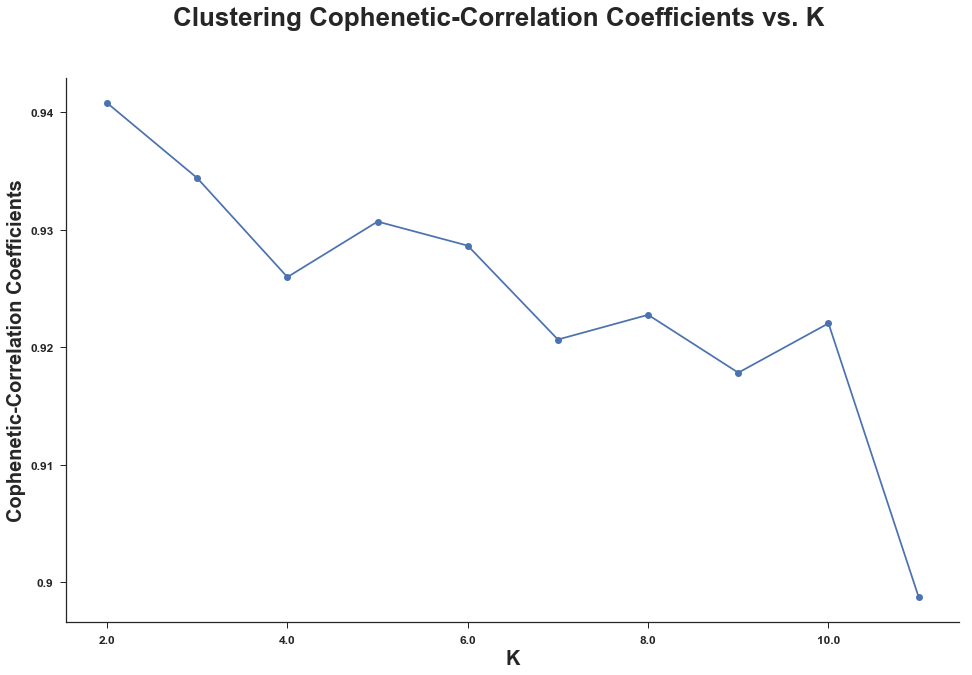

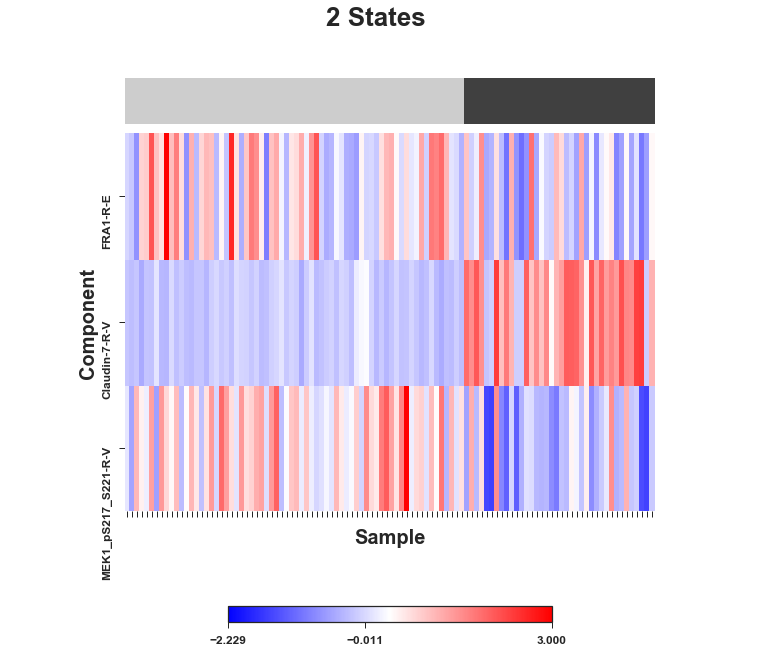

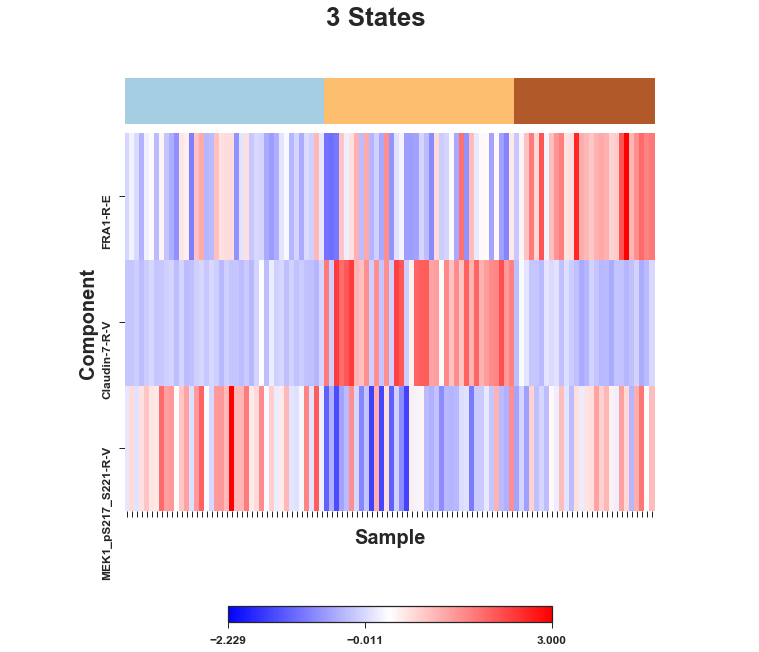

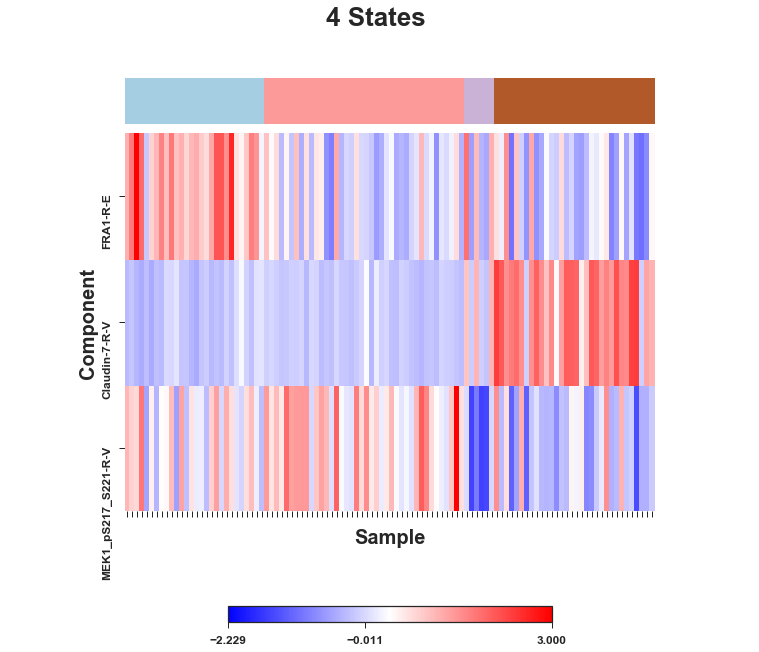

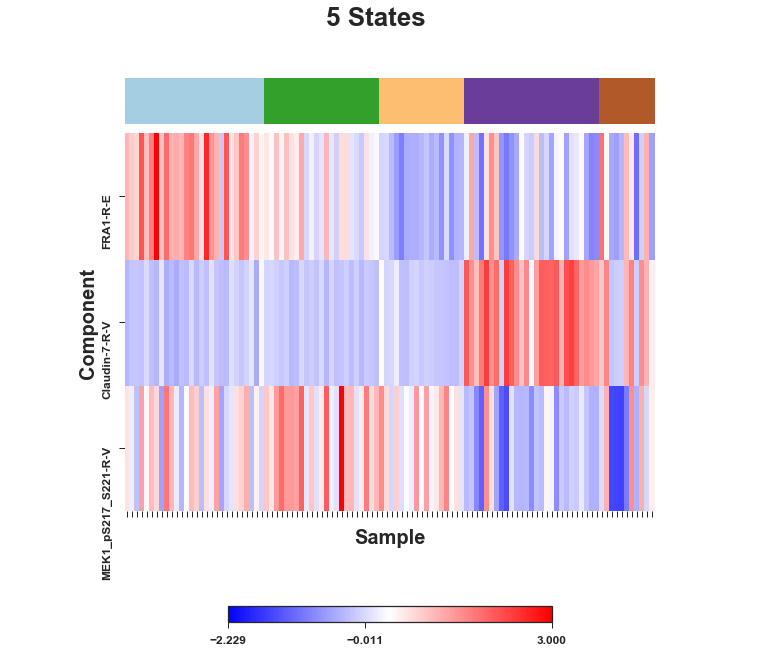

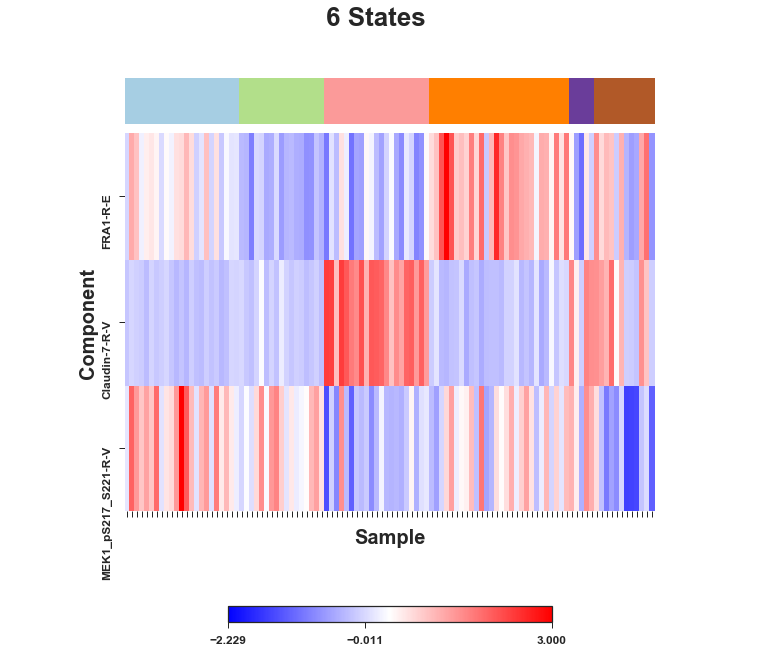

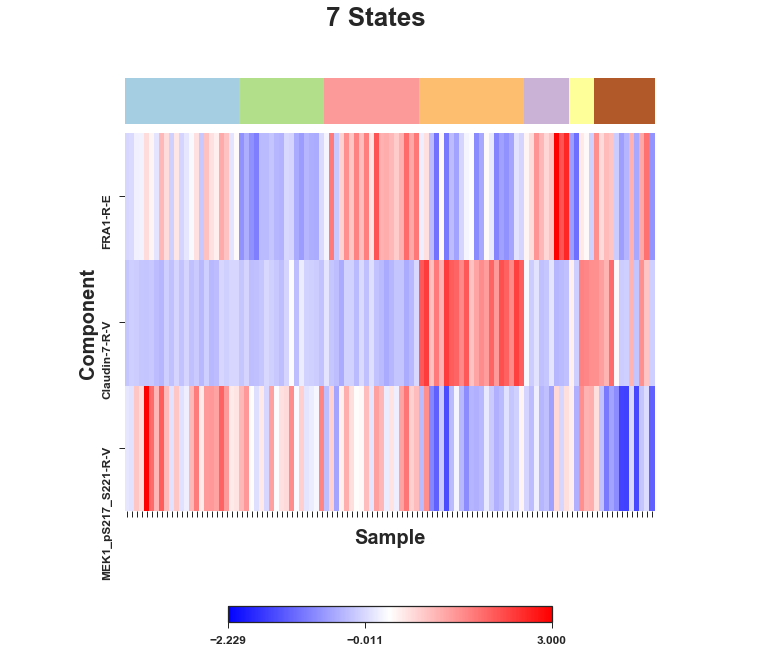

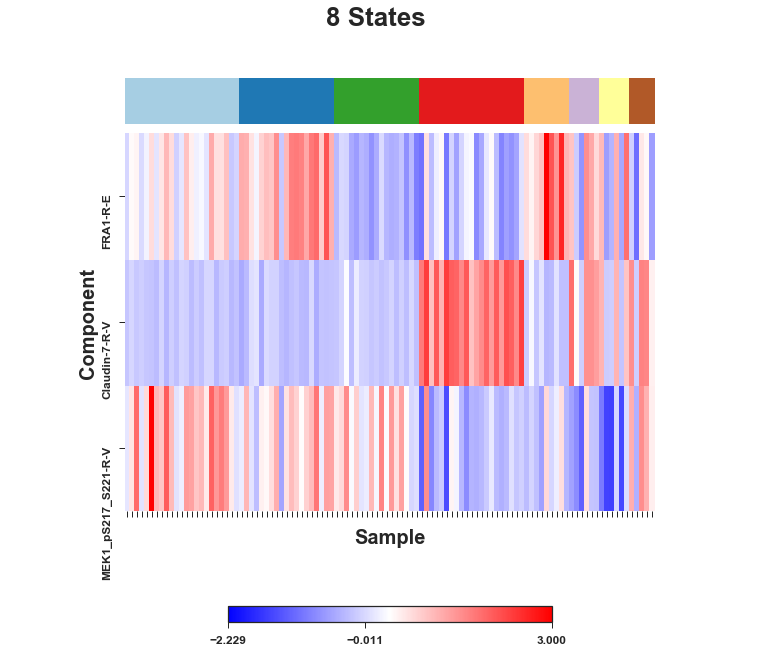

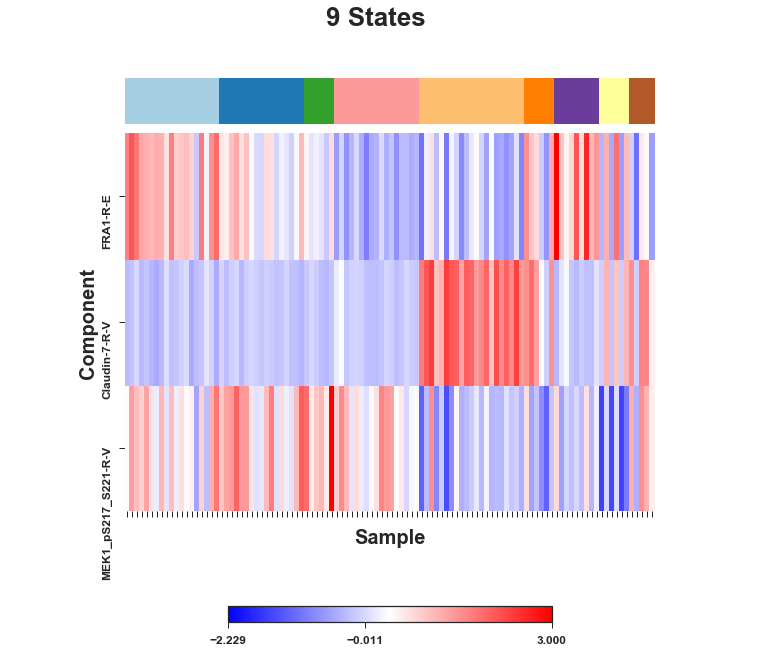

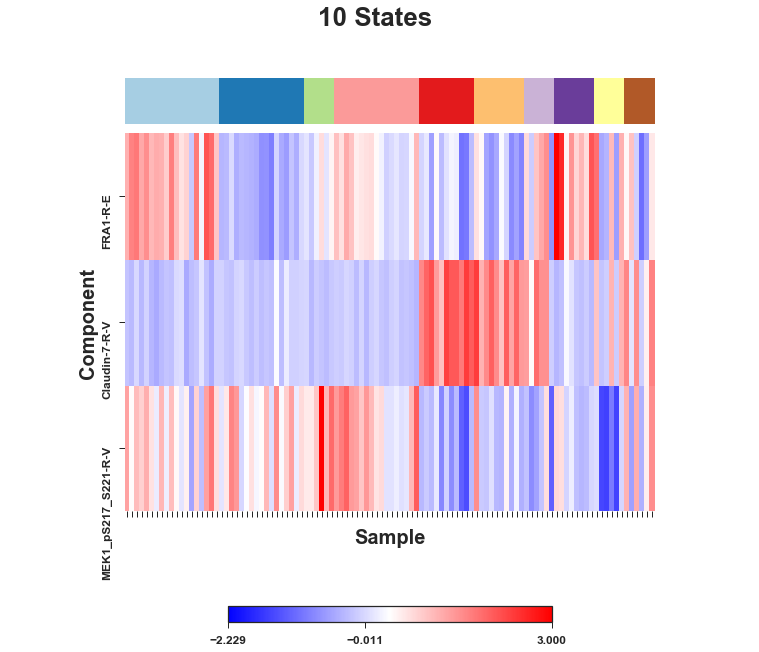

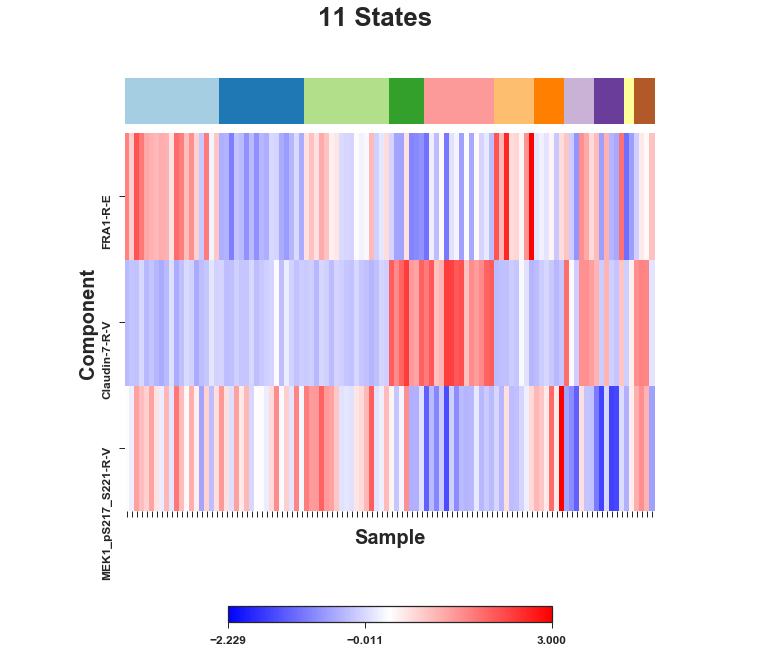

In [20]:
protein_names = ['FRA1-R-E', 'Claudin-7-R-V', 'MEK1_pS217_S221-R-V']
proteins = protein_expression_df.ix[protein_names, protein_expression_df.columns & braf_mutants]

braf_prot_dist_matrix, braf_prot_clusterings, braf_prot_cophen_coeff = ccal.oncogps.define_states(matrix = proteins,
                                                                                                                                                       ks = range(2, 12), 
                                                                                                                                                       max_std=3.25, 
                                                                                                                                                       random_seed = 2345,
                                                                                                                                                       directory_path='../results/BRAF/proteins/')

#binary_prot_labels = ccal.oncogps.define_binary_state_labels(braf_prot_clusterings, 3, state_relabeling = [1, 3, 2])
#braf_prot_sample_labels = binary_prot_labels.ix[4,:]
binary_prot_labels = ccal.support.d1.explode_series(braf_prot_clusterings.ix[3, :])
braf_prot_sample_labels = braf_prot_clusterings.ix[3, :]

relabeling = [1, 3, 2]
for i in range(len(braf_prot_sample_labels)):
            braf_prot_sample_labels.ix[i] = relabeling[braf_prot_sample_labels.ix[i] - 1]


[2017-03-10 20:09:46] Using equilateral-triangle component coordinates ...
[2017-03-10 20:09:46] Computing training sample coordinates using 3 components and 2.000 power ...
[2017-03-10 20:09:46] Computing state grids and probabilities ...
[2017-03-10 20:09:46] Plotting ...


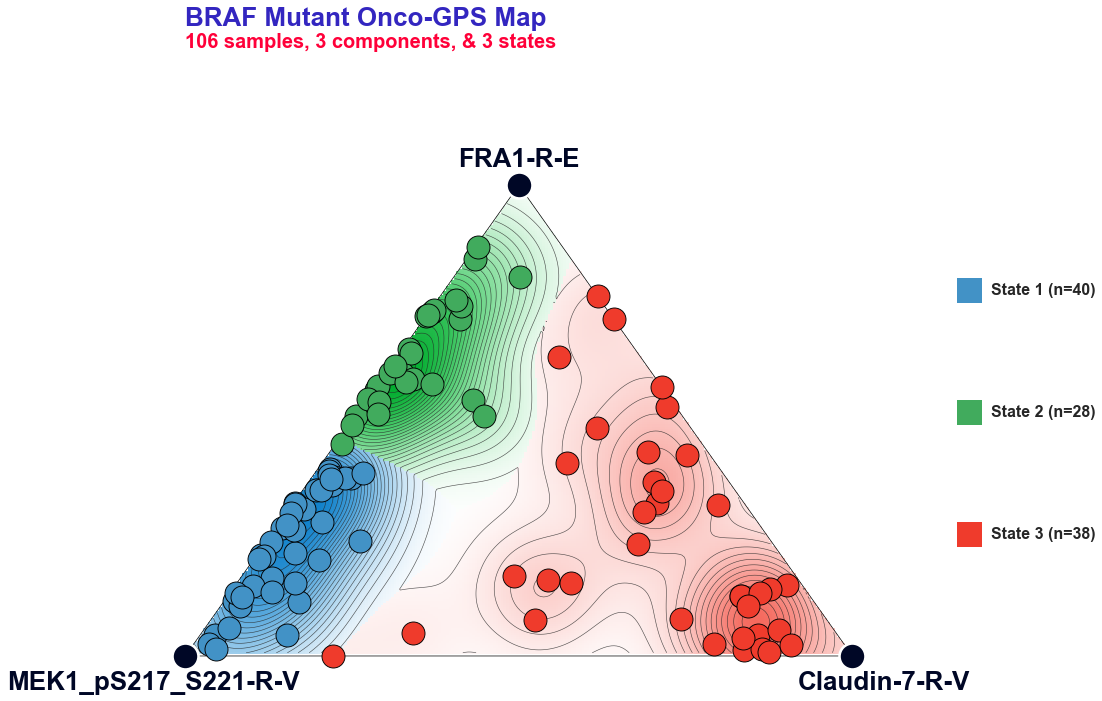

In [21]:
ccal.oncogps.make_oncogps(training_h=proteins, 
                                                     training_states=braf_prot_sample_labels,
                                                     title='BRAF Mutant Onco-GPS Map',
                                                     equilateral=True,
                                                     legend_markersize=25,
                                                     state_colors=[blue, green, red],
                                                     power = 2,
                                                     component_names=['FRA1-R-E', 'Claudin-7-R-V', 'MEK1_pS217_S221-R-V'],
                                                     kde_bandwidth_factor=0.8,
                                                     std_max=2)
                                                     #filepath=join(DIR_RESULT, 'BRAF_Onco-GPS.PROTEIN_BASED.pdf'))

<hr style="border: none; border-bottom: 1px solid #88BBEE;">
#### 7.5 Sanger Dataset Projections

In [56]:
sanger_mut_cna_df = ccal.read_gct('../data/sanger_mutations.out.gct')
sanger_gene_expression_df = ccal.read_gct('../data/sanger_Expression.out.NO_HAEM.gct')
sanger_drug_sensitivity_df = ccal.read_gct('../data/sanger_drug_sensitivity.out.gct')
sanger_pathways_df = ccal.read_gct('../data/sanger_Expression.out.NO_HAEM.SELECTED_SIGNATURES.gct')

#sanger_h_matrix = ccal.read_gct('../data/sanger_expression.out.BRAF_MUT.H_proj.v1_NO_CCLE_OVERLAP.gct')
sanger_h_matrix = ccal.read_gct('~/UCSD_2015/Sanger/Expression.out.BRAF_MUT.H_proj.v1.NO_CCLE_OVERLAP.gct')


In [57]:
sanger_h_matrix

ACN      COLO_205       HMV_II      HOP_92        HTC_C3  \
X1    57.275573  6.114006e+02   226.387671  105.095849  5.604965e+02   
X3   128.309198  1.122630e+03   210.402232   73.120886  1.039417e+02   
X9   151.582546  0.000000e+00    73.023857   60.803746  3.063202e+02   
X8   295.016068  3.345102e+02   338.363975  165.261311 -4.692896e-15   
X6  1647.406528  2.100661e+02  1661.624352  286.456368  1.184709e+02   
X7    38.731829  1.457045e+02    46.269168  968.633476  7.153086e+02   
X5   277.979085  2.419721e+02    28.396929  452.861510  7.067681e+02   
X2    64.965296  5.339654e-17   115.167773  117.547739  1.477068e-16   
X4    29.708006  1.292458e+01     0.000000  467.367284  1.561071e+02   

       IST_MEL1            K5           M14  MDA_MB_231       MMAC_SF  \
X1    27.193184  1.097276e-15  2.577158e+01  165.088942  1.051595e+02   
X3     0.000000  0.000000e+00  1.658362e+02  271.575932  1.090285e+02   
X9   229.884977  2.903317e-15  2.159353e+02   45.556670  1.664271e+02   
X8   196.658260  1.562518e+02  1.223128e+02    0.000000  1.407483e+02   
X6  1140.085218  4.837611e+02  1.700078e+03  174.346104  1.892274e+03   
X7   108.092915  6.421579e+02  2.813153e+02  918.005420  7.040149e-15   
X5   123.410999  5.488823e+02  1.689226e+02  519.131592  2.289777e+02   
X2   158.098236 -3.777083e-14 -2.557420e-16  122.358133  0.000000e+00   
X4   727.912382  8.252033e+02 -2.346448e-15  471.089066  6.135437e+01   

         MZ7_mel     NCI_H2170   NCI_H2405     RPMI_7951      RVH_421  \
X1  8.785205e+01  9.223209e+02    0.000000  0.000000e+00    33.268254   
X3  1.314826e+02  5.842183e+02  464.627370  6.260315e+01   152.340234   
X9  1.996696e+02  1.727766e+01  531.541009  3.142346e+01    92.944169   
X8  2.417339e+02  4.603886e+02  125.448043  2.045910e+02   205.964723   
X6  1.739329e+03  1.181167e+02  221.398537  6.917690e+02  1647.701763   
X7 -2.414566e-16  2.277539e+02  699.825969  4.209143e+02   181.935134   
X5  2.844366e+02  3.614746e+02  325.157981  1.881641e+02   223.978578   
X2  9.160159e-17 -1.931927e-14  138.987721 -8.418510e-17     0.000000   
X4  0.000000e+00  0.000000e+00  148.981652  1.100144e+03   150.741593   

           SW872         SW982  
X1  3.653852e-15  3.249957e+01  
X3  0.000000e+00  0.000000e+00  
X9  2.644090e+02  2.030453e+02  
X8  2.548725e+02  1.068799e+02  
X6  7.068623e+02  5.826637e+02  
X7  3.143165e+02  5.745291e+02  
X5  9.865233e+01  7.267418e+01  
X2  2.018970e+02 -7.314926e-17  
X4  8.753408e+02  1.139210e+03

In [60]:
sanger_h_matrix2 = sanger_h_matrix.ix[[5, 1, 4], :]  # entries 5, 1, 4 are C7, C3 and C6
sanger_h_matrix2.index = [7, 3, 6]

In [61]:
sanger_h_matrix2

ACN     COLO_205       HMV_II      HOP_92      HTC_C3     IST_MEL1  \
7    38.731829   145.704495    46.269168  968.633476  715.308573   108.092915   
3   128.309198  1122.629585   210.402232   73.120886  103.941698     0.000000   
6  1647.406528   210.066086  1661.624352  286.456368  118.470873  1140.085218   

           K5          M14  MDA_MB_231       MMAC_SF       MZ7_mel  \
7  642.157866   281.315338  918.005420  7.040149e-15 -2.414566e-16   
3    0.000000   165.836243  271.575932  1.090285e+02  1.314826e+02   
6  483.761131  1700.077777  174.346104  1.892274e+03  1.739329e+03   

    NCI_H2170   NCI_H2405   RPMI_7951      RVH_421       SW872       SW982  
7  227.753931  699.825969  420.914268   181.935134  314.316531  574.529056  
3  584.218286  464.627370   62.603151   152.340234    0.000000    0.000000  
6  118.116690  221.398537  691.769013  1647.701763  706.862317  582.663723

[2017-03-10 22:15:07] Using equilateral-triangle component coordinates ...
[2017-03-10 22:15:07] Computing training sample coordinates using 3 components and 1.000 power ...
[2017-03-10 22:15:07] Computing state grids and probabilities ...
[2017-03-10 22:15:07] Computing testing sample coordinates using 3 components and 1.000 power ...
[2017-03-10 22:15:07] Plotting ...


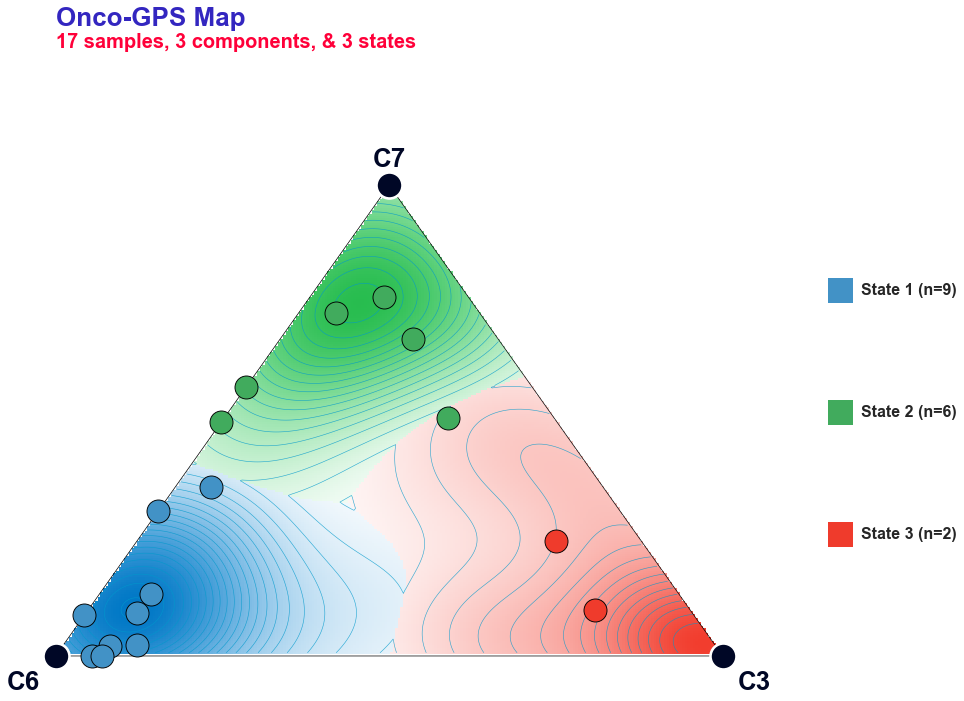

In [65]:
ccal.oncogps.make_oncogps(training_h=braf_h_matrix, 
                              training_states=braf_sample_labels, 
                              testing_h = sanger_h_matrix2,                
                              testing_h_normalization=None,
                              equilateral=True,
                              legend_markersize=25,
                              state_colors=[blue, green, red],
                              power = 1,
                              kde_bandwidth_factor=0.8,
                              contour_linecolor=light_blue,
                              #sample_name_color='black',
                              component_names = ["C7", "C3", "C6"],
                              std_max = 2)
                              #filepath=join(DIR_RESULT, 'Sanger_BRAF_Onco-GPS_Feature_{}.pdf'.format(annotation.name)))


In [64]:
sanger_h_matrix2.columns

Index(['ACN', 'COLO_205', 'HMV_II', 'HOP_92', 'HTC_C3', 'IST_MEL1', 'K5',
       'M14', 'MDA_MB_231', 'MMAC_SF', 'MZ7_mel', 'NCI_H2170', 'NCI_H2405',
       'RPMI_7951', 'RVH_421', 'SW872', 'SW982'],
      dtype='object')

In [66]:
predicted_state  = ccal.support.d1.make_series([1,3,1,2,2,1,2,1,2,1,1,3,2,1,1,1,2], 
                                            index=sanger_h_matrix2.columns, name='predicted_state')

[2017-03-10 22:15:34] Using equilateral-triangle component coordinates ...
[2017-03-10 22:15:34] Computing training sample coordinates using 3 components and 1.000 power ...
[2017-03-10 22:15:34] Computing state grids and probabilities ...
[2017-03-10 22:15:34] Computing testing sample coordinates using 3 components and 1.000 power ...
[2017-03-10 22:15:34] Plotting ...
[2017-03-10 22:15:37] Using equilateral-triangle component coordinates ...
[2017-03-10 22:15:37] Computing training sample coordinates using 3 components and 1.000 power ...
[2017-03-10 22:15:37] Computing state grids and probabilities ...
[2017-03-10 22:15:37] Computing testing sample coordinates using 3 components and 1.000 power ...
[2017-03-10 22:15:37] Plotting ...
[2017-03-10 22:15:40] Using equilateral-triangle component coordinates ...
[2017-03-10 22:15:40] Computing training sample coordinates using 3 components and 1.000 power ...
[2017-03-10 22:15:40] Computing state grids and probabilities ...
[2017-03-10 22

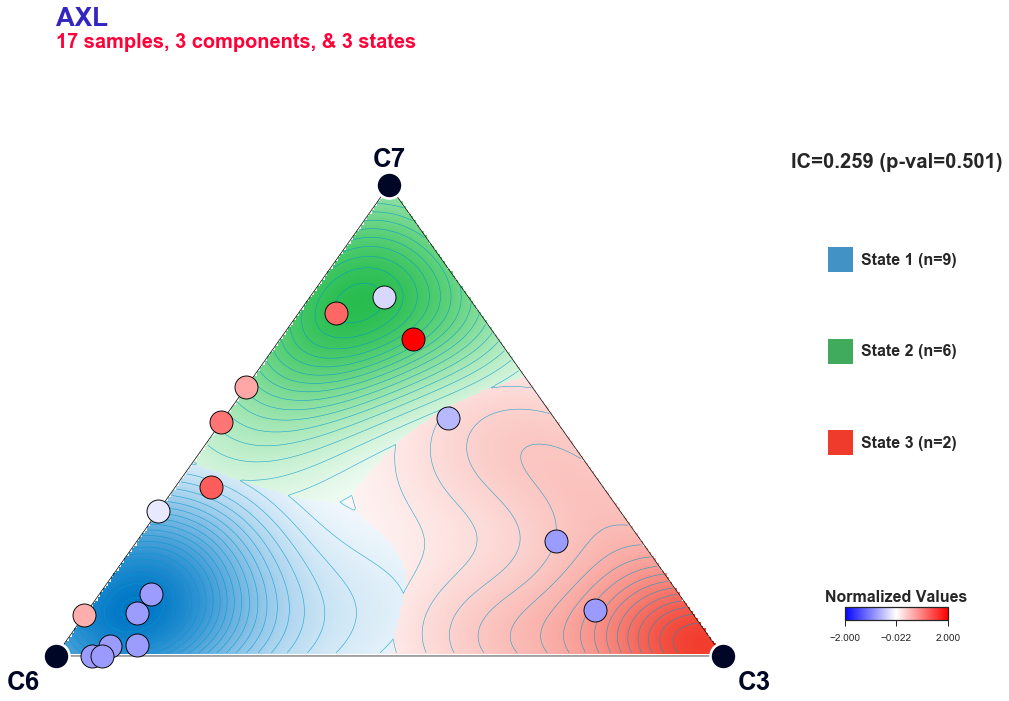

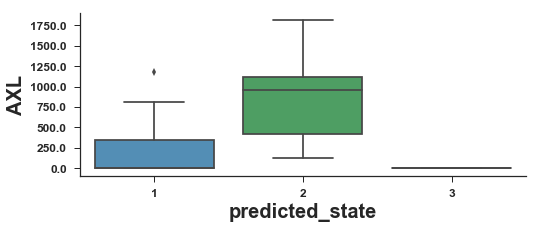

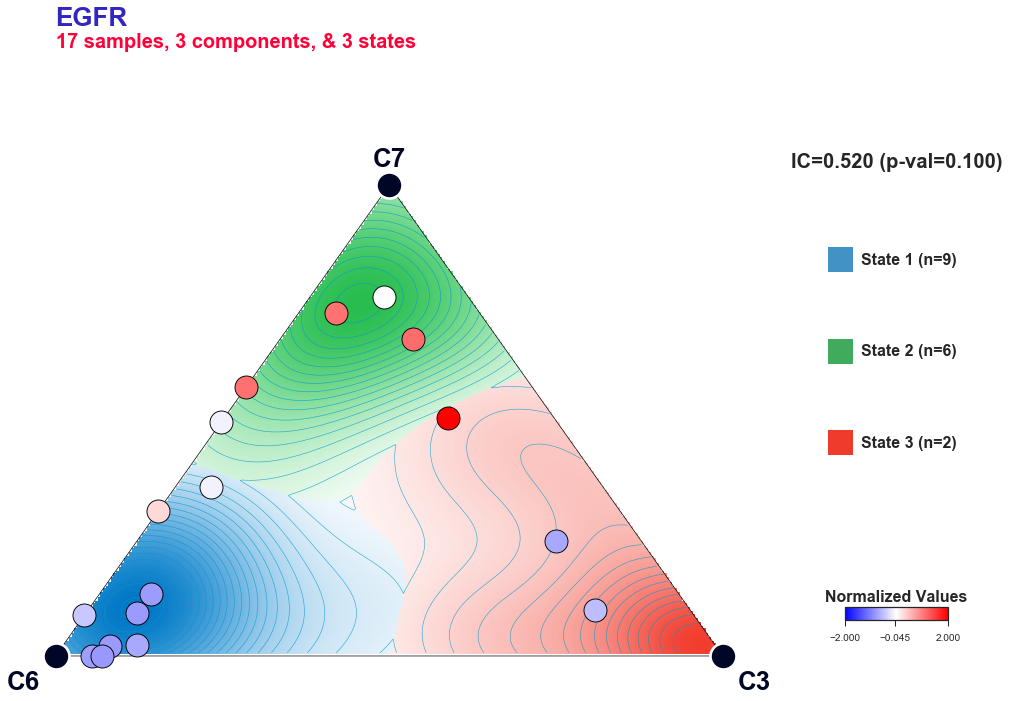

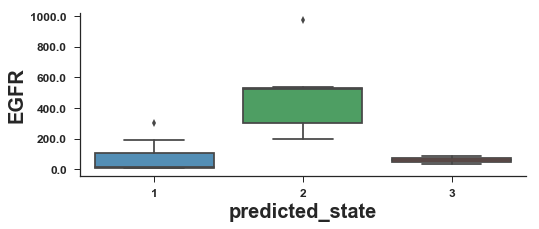

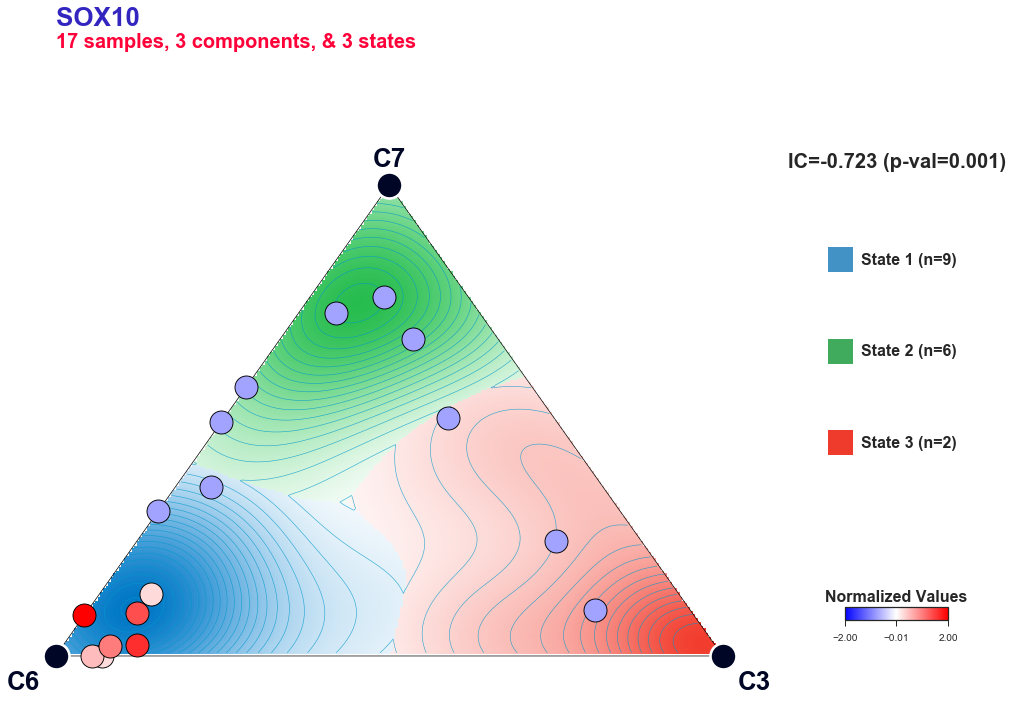

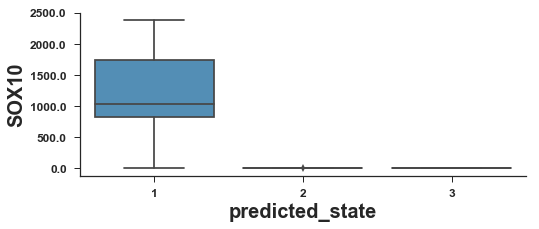

In [67]:
for i, alias in [('AXL', 'AXL'),
                        ('EGFR','EGFR'),
                        ('SOX10','SOX10')]:
    
    testing_annotation = sanger_gene_expression_df .ix[i, :]
    testing_annotation.name = alias

    ccal.oncogps.make_oncogps(training_h=braf_h_matrix, 
                              training_states=braf_sample_labels, 
                              testing_h = sanger_h_matrix2,
                              testing_h_normalization=None,
                              testing_annotation=testing_annotation,           
                              title =testing_annotation.name, 
                              equilateral=True,
                              legend_markersize=25,
                              state_colors=[blue, green, red],
                              power = 1,
                              kde_bandwidth_factor=0.8,
                              contour_linecolor=light_blue,
                              component_names = ["C7", "C3", "C6"],
                              # sample_name_color='000726',
                              std_max = 2)
                              #filepath=join(DIR_RESULT, 'Sanger_BRAF_Onco-GPS_Feature_{}.pdf'.format(annotation.name)))
        
    ccal.plot_violin_box_or_bar(predicted_state, testing_annotation.ix[predicted_state.index], 
                                colors=[blue, green, red], violin_or_box='box', figure_size=(8,3))

[2017-03-10 22:17:36] Using equilateral-triangle component coordinates ...
[2017-03-10 22:17:36] Computing training sample coordinates using 3 components and 1.000 power ...
[2017-03-10 22:17:36] Computing state grids and probabilities ...
[2017-03-10 22:17:36] Computing testing sample coordinates using 3 components and 1.000 power ...
[2017-03-10 22:17:36] Plotting ...
[2017-03-10 22:17:39] Using equilateral-triangle component coordinates ...
[2017-03-10 22:17:39] Computing training sample coordinates using 3 components and 1.000 power ...
[2017-03-10 22:17:39] Computing state grids and probabilities ...
[2017-03-10 22:17:39] Computing testing sample coordinates using 3 components and 1.000 power ...
[2017-03-10 22:17:39] Plotting ...
[2017-03-10 22:17:42] Using equilateral-triangle component coordinates ...
[2017-03-10 22:17:42] Computing training sample coordinates using 3 components and 1.000 power ...
[2017-03-10 22:17:42] Computing state grids and probabilities ...
[2017-03-10 22

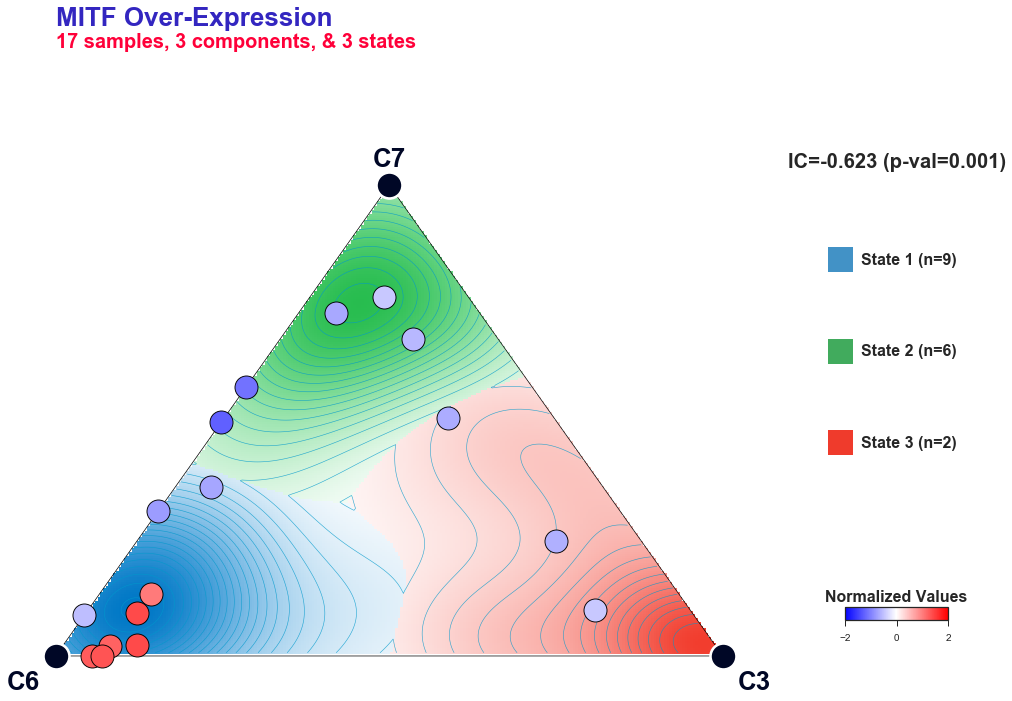

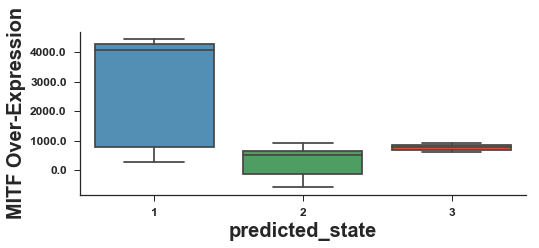

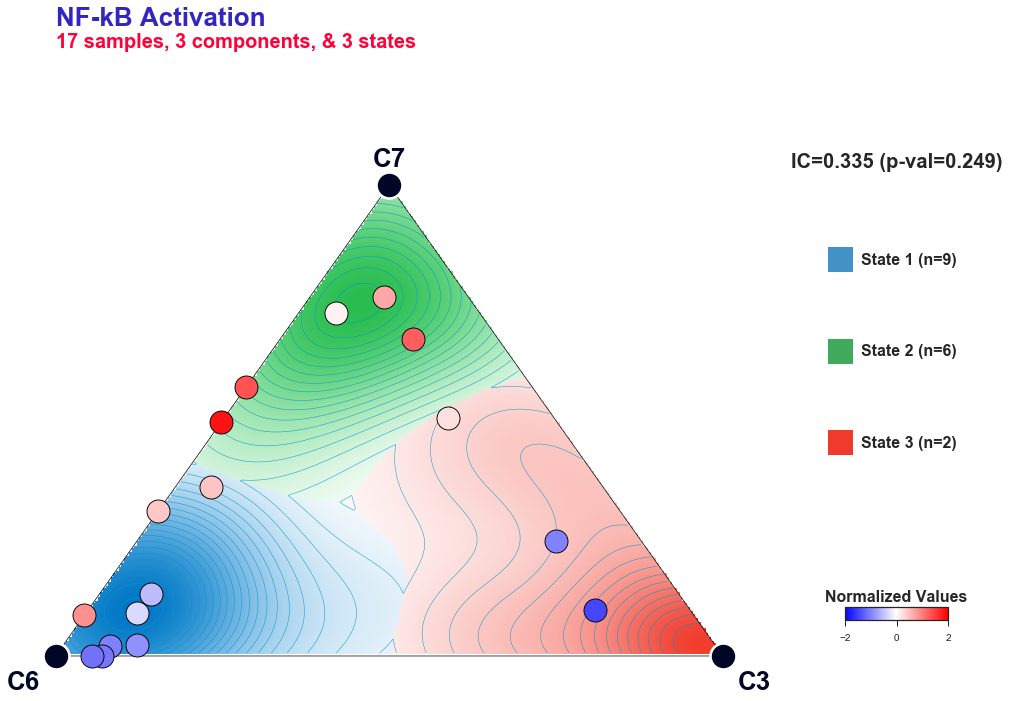

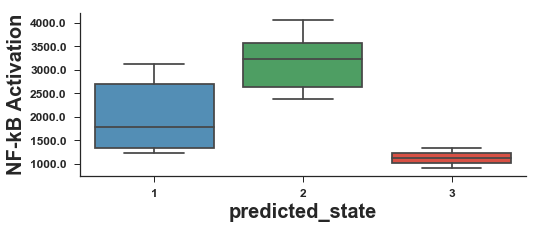

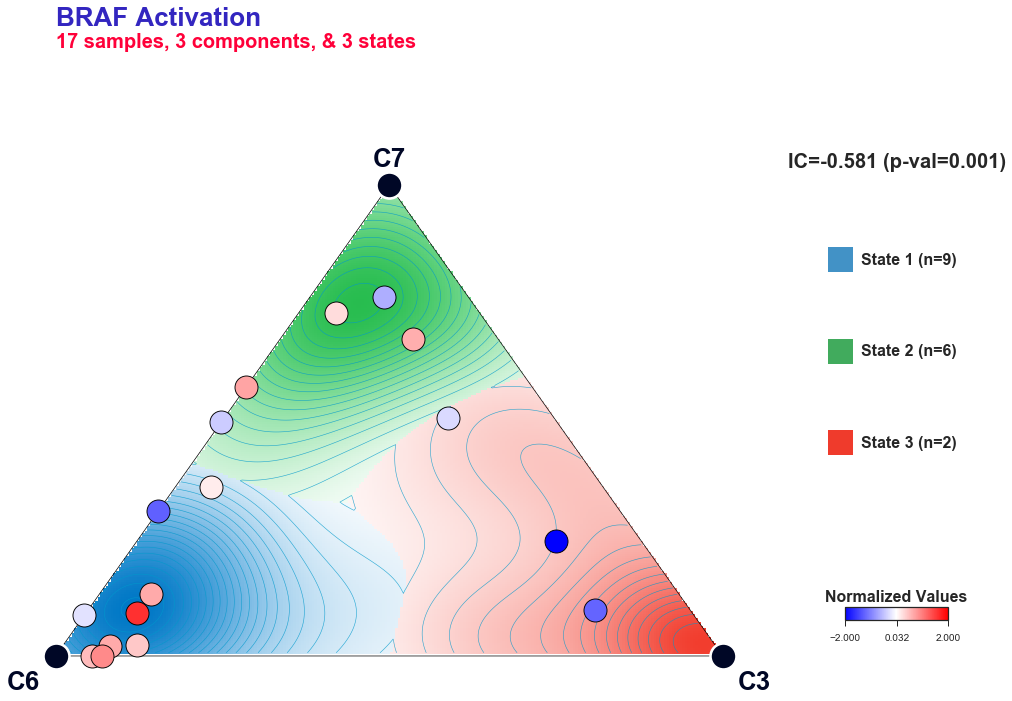

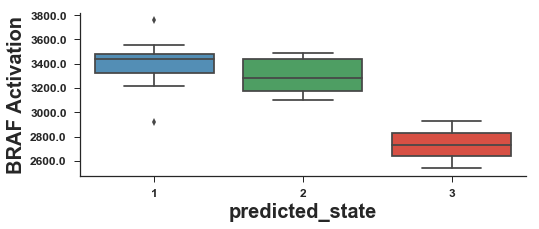

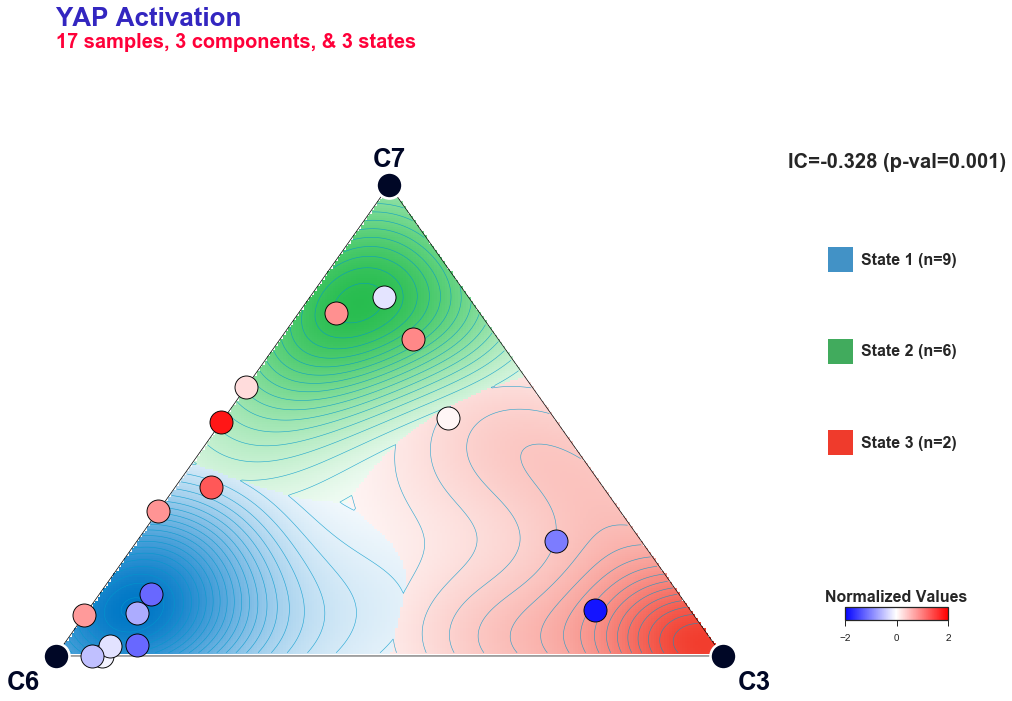

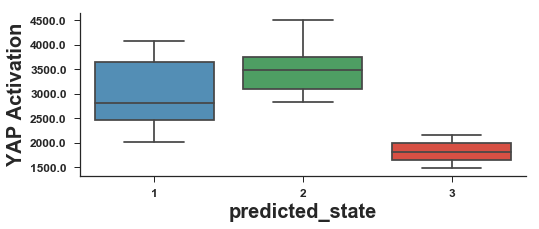

In [68]:
for i, alias in [('Yokoyama_et_al_MITF_UP','MITF Over-Expression'),
                        ('SCHOEN_NFKB_SIGNALING','NF-kB Activation'),
                        ('BRAF_UP','BRAF Activation'),
                        ('CORDENONSI_YAP_CONSERVED_SIGNATURE', 'YAP Activation')]:
    
    testing_annotation = sanger_pathways_df.ix[i, :]
    testing_annotation.name = alias

    ccal.oncogps.make_oncogps(training_h=braf_h_matrix, 
                              training_states=braf_sample_labels, 
                              testing_h = sanger_h_matrix2,
                              testing_h_normalization=None,
                              testing_annotation=testing_annotation,           
                              title =testing_annotation.name, 
                              equilateral=True,
                              legend_markersize=25,
                              state_colors=[blue, green, red],
                              power = 1,
                              kde_bandwidth_factor=0.8,
                              contour_linecolor=light_blue,
                              component_names = ["C7", "C3", "C6"],
                              std_max = 2)
                              #filepath=join(DIR_RESULT, 'Sanger_BRAF_Onco-GPS_Feature_{}.pdf'.format(annotation.name)))
        
    ccal.plot_violin_box_or_bar(predicted_state, testing_annotation.ix[predicted_state.index], 
                                colors=[blue, green, red], violin_or_box='box', figure_size=(8,3))

[2017-03-10 22:17:58] Using equilateral-triangle component coordinates ...
[2017-03-10 22:17:58] Computing training sample coordinates using 3 components and 1.000 power ...
[2017-03-10 22:17:58] Computing state grids and probabilities ...
[2017-03-10 22:17:58] Computing testing sample coordinates using 3 components and 1.000 power ...
[2017-03-10 22:17:58] Plotting ...


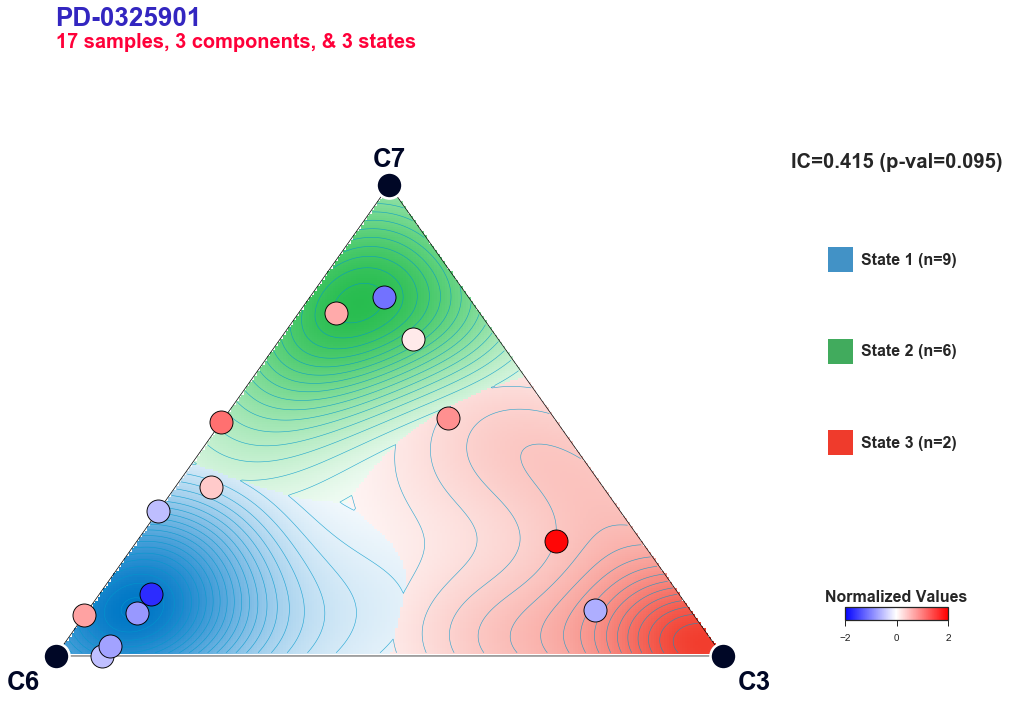

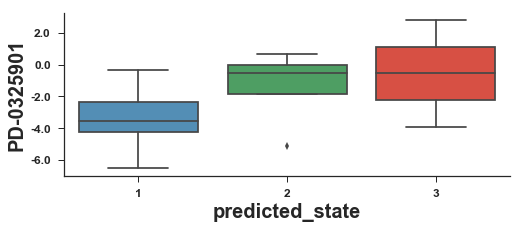

In [70]:
for i, alias in [('PD-0325901_IC_50', 'PD-0325901')]:
    
    testing_annotation = sanger_drug_sensitivity_df.ix[i, :]
    testing_annotation.name = alias

    ccal.oncogps.make_oncogps(training_h=braf_h_matrix, 
                              training_states=braf_sample_labels, 
                              testing_h = sanger_h_matrix2,
                              testing_h_normalization=None,
                              testing_annotation=testing_annotation,           
                              title =testing_annotation.name, 
                              equilateral=True,
                              legend_markersize=25,
                              state_colors=[blue, green, red],
                              power = 1,
                              kde_bandwidth_factor=0.8,
                              contour_linecolor=light_blue,
                              component_names = ["C7", "C3", "C6"],
                              std_max = 2)
                              #filepath=join(DIR_RESULT, 'Sanger_BRAF_Onco-GPS_Feature_{}.pdf'.format(annotation.name)))
        
    ccal.plot_violin_box_or_bar(predicted_state, testing_annotation.ix[predicted_state.index], 
                                colors=[blue, green, red], violin_or_box='box', figure_size=(8,3))



#### Onco-GPS for BRAF inhibition predictions

In [69]:
train_predictions_df

A2780_OVARY  CCFSTTG1_CENTRAL_NERVOUS_SYSTEM  COLO783_SKIN  \
target.train.vec0     0.296511                         0.570564      0.306941   
target.train.vec      0.000000                         0.000000      0.000000   
log.odds             -1.132397                        -1.431489      2.208911   
log.odds.inv          1.132397                         1.431489     -2.208911   
prob.model.train      0.243719                         0.192867      0.901047   
predicted.model       0.000000                         0.000000      1.000000   

                   COLO829_SKIN  CW2_LARGE_INTESTINE  ES2_OVARY  \
target.train.vec0     -1.550216             0.993802   0.044332   
target.train.vec       1.000000             0.000000   0.000000   
log.odds               2.580603            -5.029157  -0.523471   
log.odds.inv          -2.580603             5.029157   0.523471   
prob.model.train       0.929603             0.006502   0.372041   
predicted.model        1.000000             0.000000   0.000000   

                   GP2D_LARGE_INTESTINE  HEC1A_ENDOMETRIUM  HEC1B_ENDOMETRIUM  \
target.train.vec0              0.575511           0.459703           0.628199   
target.train.vec               0.000000           0.000000           0.000000   
log.odds                      -5.045443          -4.464034          -4.412640   
log.odds.inv                   5.045443           4.464034           4.412640   
prob.model.train               0.006397           0.011385           0.011978   
predicted.model                0.000000           0.000000           0.000000   

                   HEYA8_OVARY     ...       SNU503_LARGE_INTESTINE  \
target.train.vec0     0.400875     ...                     1.134166   
target.train.vec      0.000000     ...                     0.000000   
log.odds             -3.958710     ...                    -1.823179   
log.odds.inv          3.958710     ...                     1.823179   
prob.model.train      0.018730     ...                     0.139053   
predicted.model       0.000000     ...                     0.000000   

                   SNU738_CENTRAL_NERVOUS_SYSTEM  SNUC4_LARGE_INTESTINE  \
target.train.vec0                       1.282636               0.471683   
target.train.vec                        0.000000               0.000000   
log.odds                               -1.671672              -1.871348   
log.odds.inv                            1.671672               1.871348   
prob.model.train                        0.158201               0.133386   
predicted.model                         0.000000               0.000000   

                   SNUC5_LARGE_INTESTINE  SW1271_LUNG  WM1799_SKIN  \
target.train.vec0              -0.679363     0.622179    -1.511773   
target.train.vec                1.000000     0.000000     1.000000   
log.odds                       -1.856811    -4.451362     2.463187   
log.odds.inv                    1.856811     4.451362    -2.463187   
prob.model.train                0.135075     0.011528     0.921520   
predicted.model                 0.000000     0.000000     1.000000   

                   WM2664_SKIN  WM793_SKIN  WM88_SKIN  WM983B_SKIN  
target.train.vec0    -1.254409   -0.573330  -2.798950    -1.876183  
target.train.vec      1.000000    1.000000   1.000000     1.000000  
log.odds              2.277747    0.555739  -0.972076     2.164459  
log.odds.inv         -2.277747   -0.555739   0.972076    -2.164459  
prob.model.train      0.907017    0.635466   0.274467     0.897012  
predicted.model       1.000000    1.000000   0.000000     1.000000  

[6 rows x 49 columns]

[2017-03-10 21:46:14] Using equilateral-triangle component coordinates ...
[2017-03-10 21:46:14] Computing training sample coordinates using 3 components and 1.000 power ...
[2017-03-10 21:46:14] Computing state grids and probabilities ...
[2017-03-10 21:46:14] Plotting ...


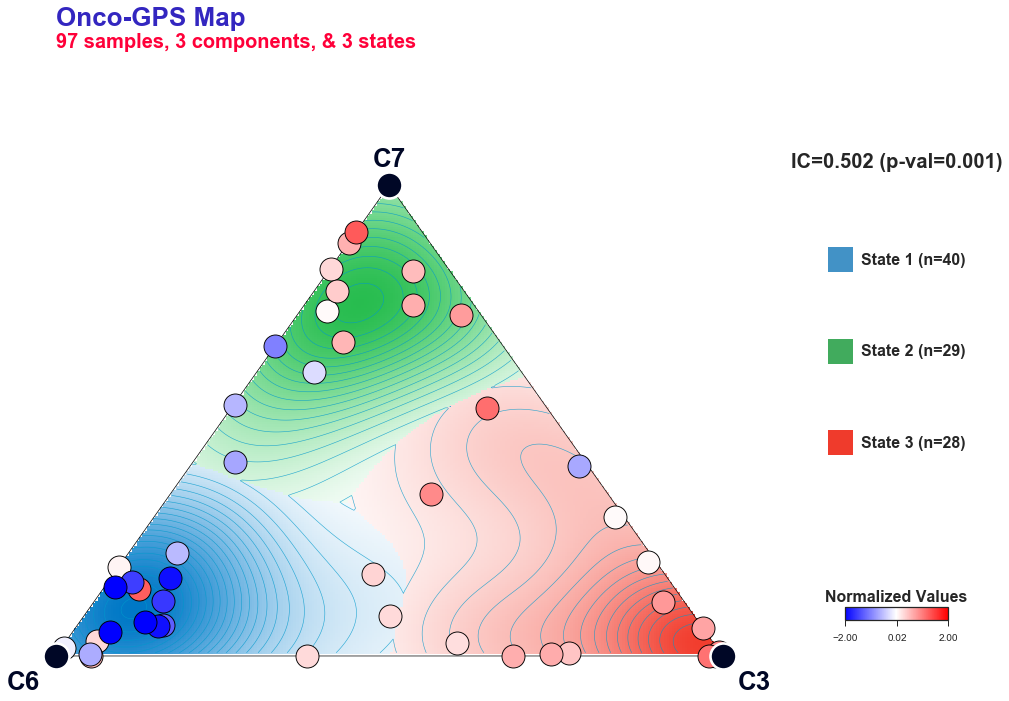

In [49]:
train_predictions_df = ccal.read_gct('~/UCSD_2015/signatures/new.output.train.gct')

ccal.oncogps.make_oncogps(training_h=braf_h_matrix, 
                              training_states=braf_sample_labels, 
                              training_annotation=  train_predictions_df.ix['target.train.vec0',:],         
                              equilateral=True,
                              legend_markersize=25,
                              state_colors=[blue, green, red],
                              power = 1,
                              kde_bandwidth_factor=0.8,
                              contour_linecolor=light_blue,
                              component_names = ["C7", "C3", "C6"],
                              std_max = 2)
                              #filepath=join(DIR_RESULT, 'Sanger_BRAF_Onco-GPS_Feature_{}.pdf'.format(annotation.name)))

[2017-03-10 21:46:24] Using equilateral-triangle component coordinates ...
[2017-03-10 21:46:24] Computing training sample coordinates using 3 components and 1.000 power ...
[2017-03-10 21:46:24] Computing state grids and probabilities ...
[2017-03-10 21:46:24] Plotting ...


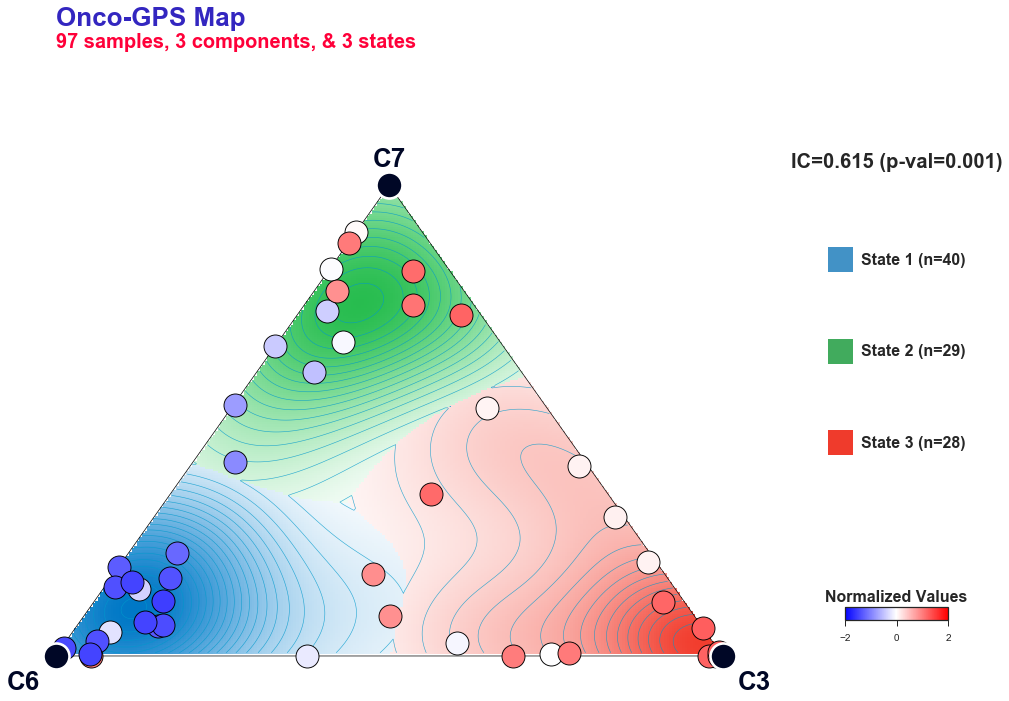

In [50]:


ccal.oncogps.make_oncogps(training_h=braf_h_matrix, 
                              training_states=braf_sample_labels, 
                              training_annotation=  train_predictions_df.ix['log.odds.inv',:],         
                              equilateral=True,
                              legend_markersize=25,
                              state_colors=[blue, green, red],
                              power = 1,
                              kde_bandwidth_factor=0.8,
                              contour_linecolor=light_blue,
                              component_names = ["C7", "C3", "C6"],
                              std_max = 2)
                              #filepath=join(DIR_RESULT, 'Sanger_BRAF_Onco-GPS_Feature_{}.pdf'.format(annotation.name)))


In [40]:
sanger_braf_h_matrix_df = ccal.read_gct('~/CGP2014/signatures/new_data/new.Sanger.BRAF_mut_Components.gct')

In [53]:
sanger_braf_h_matrix2_df = sanger_braf_h_matrix_df.ix[[1, 2, 0],:]

In [42]:
braf_h_matrix

NCIH2227_LUNG  OUMS23_LARGE_INTESTINE  NCIH2087_LUNG  SKMEL1_SKIN  \
7     482.151580                4.355349    2636.991182   207.434806   
3      68.723068             1220.120201    1357.131768   680.296541   
6     640.700141              636.812487     297.307079  6855.149858   

   DU4475_BREAST  NCIH508_LARGE_INTESTINE  NCIH1651_LUNG  NCIH1666_LUNG  \
7    1278.564691                43.278860      26.104288    2396.865307   
3    2568.678370              5943.860596     955.492930      16.337564   
6     111.809849                47.644758     945.263114     109.636808   

   HS936T_SKIN  SKMEL28_SKIN         ...          SKMEL5_SKIN  WM2664_SKIN  \
7     0.911569    232.432574         ...            75.903030   231.713329   
3    12.568805    576.180663         ...           293.781327   766.966085   
6  7198.986589   7979.550407         ...          7250.837390  7307.370699   

   KM12_LARGE_INTESTINE  LOXIMVI_SKIN  UACC257_SKIN   IGR37_SKIN  \
7            407.860111   2784.812045      0.213284    51.672127   
3           5119.864679    285.220477    731.115101    17.207702   
6            284.341936   2250.675529   7976.818336  7362.671237   

   BHT101_THYROID  BCPAP_THYROID  CL34_LARGE_INTESTINE  JHUEM7_ENDOMETRIUM  
7     3521.193251    3112.441778            126.167532          133.394766  
3     1592.021448     265.039386           6187.781454         1222.865019  
6      506.320409    1496.577871              0.391194         1846.051395  

[3 rows x 97 columns]

[2017-03-10 22:01:25] Using equilateral-triangle component coordinates ...
[2017-03-10 22:01:25] Computing training sample coordinates using 3 components and 1.000 power ...
[2017-03-10 22:01:25] Computing state grids and probabilities ...
[2017-03-10 22:01:26] Computing testing sample coordinates using 3 components and 1.000 power ...
[2017-03-10 22:01:26] Plotting ...


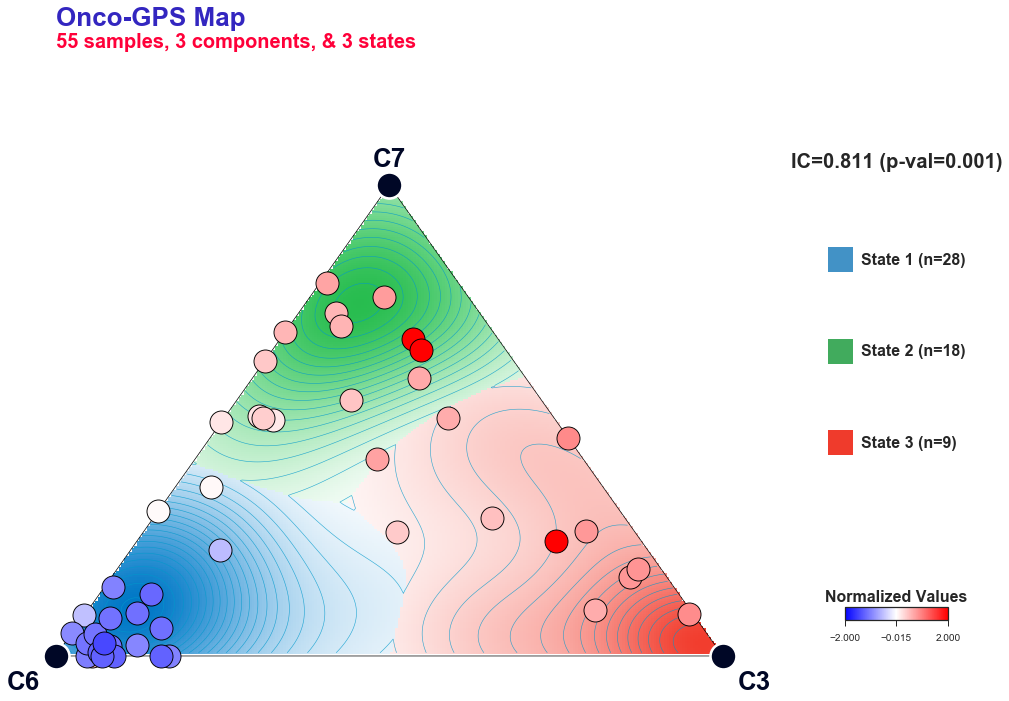

In [52]:
test_predictions_df = ccal.read_gct('~/UCSD_2015/signatures/new.output.test.gct')          
                                                                      
ccal.oncogps.make_oncogps(training_h=braf_h_matrix, 
                              training_states=braf_sample_labels, 
                              testing_h = sanger_braf_h_matrix2_df,                
                              testing_h_normalization=None,
                              testing_annotation= test_predictions_df.ix['log.odds.inv',:], 
                              equilateral=True,
                              legend_markersize=25,
                              state_colors=[blue, green, red],
                              power = 1,
                              kde_bandwidth_factor=0.8,
                              contour_linecolor=light_blue,
                              #sample_name_color='black',
                              component_names = ["C7", "C3", "C6"],
                              std_max = 2)
                              #filepath=join(DIR_RESULT, 'Sanger_BRAF_Onco-GPS_Feature_{}.pdf'.format(annotation.name)))